In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading csv file
df=pd.read_csv('claim.csv')
df

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


# Data Exploration (exploratory data analysis or EDA)

In [3]:
#Display The head ==> To Check if Data is Properly Imported
df.head(10)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,US,IA,Iowa,825.629780,Yes,Basic,Bachelor,1/25/11,Employed,...,94,0,2,Personal Auto,Personal L3,Hail,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,US,IA,Iowa,538.089864,Yes,Basic,College,2/24/11,Employed,...,13,0,9,Corporate Auto,Corporate L3,Collision,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,US,NE,Nebraska,721.610031,No,Premium,Master,1/18/11,Unemployed,...,68,0,4,Corporate Auto,Corporate L3,Collision,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,US,IA,Iowa,2412.750402,Yes,Basic,Bachelor,1/26/11,Medical Leave,...,3,0,2,Corporate Auto,Corporate L3,Collision,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,US,IA,Iowa,738.817808,No,Extended,College,2/17/11,Employed,...,7,0,8,Special Auto,Special L2,Hail,Branch,425.527834,Four-Door Car,Medsize


In [4]:
#To check the shape of the dataset
df.shape # (rows, columns)

(9134, 26)

In [5]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [6]:
# check for duplicates
print('sum of duplicated values{}\n'.format(df.duplicated().sum()))

sum of duplicated values0



In [7]:
# Are there any missing values?
df.isna().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
#Lets describe the dataset
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### According to Described Information:
All Features are not Normally Distributed( Theortically if feature is normally distributed, Mean = Median = Mode )
mean is higher than the median, which means  data is right skewed and ouliers are present

In [9]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of Customer : 9134
number of unique valuse of Country : 1
number of unique valuse of State Code : 5
number of unique valuse of State : 5
number of unique valuse of Claim Amount : 8041
number of unique valuse of Response : 2
number of unique valuse of Coverage : 3
number of unique valuse of Education : 5
number of unique valuse of Effective To Date : 59
number of unique valuse of EmploymentStatus : 5
number of unique valuse of Gender : 2
number of unique valuse of Income : 5694
number of unique valuse of Location Code : 3
number of unique valuse of Marital Status : 3
number of unique valuse of Monthly Premium Auto : 202
number of unique valuse of Months Since Last Claim : 36
number of unique valuse of Months Since Policy Inception : 100
number of unique valuse of Number of Open Complaints : 6
number of unique valuse of Number of Policies : 9
number of unique valuse of Policy Type : 3
number of unique valuse of Policy : 9
number of unique valuse of Claim Reason : 

In [10]:
#Separate categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [11]:
#calculating total count and percentage of all objects fields
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= df[col].value_counts()
    percent = df[col].value_counts() / df.shape[0]
    df1 = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df1)
    print('\n')

--------------------Customer-------------------------
         total   percent
AP46166      1  0.000109
ER66372      1  0.000109
GF68713      1  0.000109
NW19960      1  0.000109
LX24476      1  0.000109
...        ...       ...
MT91823      1  0.000109
JI94264      1  0.000109
ZG10765      1  0.000109
BC87161      1  0.000109
KS46420      1  0.000109

[9134 rows x 2 columns]


--------------------Country-------------------------
    total  percent
US   9134      1.0


--------------------State Code-------------------------
    total   percent
MO   3150  0.344865
IA   2601  0.284760
NE   1703  0.186446
OK    882  0.096562
KS    798  0.087366


--------------------State-------------------------
          total   percent
Missouri   3150  0.344865
Iowa       2601  0.284760
Nebraska   1703  0.186446
Oklahoma    882  0.096562
Kansas      798  0.087366


--------------------Response-------------------------
     total   percent
No    7826  0.856799
Yes   1308  0.143201


--------------------

In [12]:
# Check if ? is present
for col in df:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")

? in Customer: 0
? in Country: 0
? in State Code: 0
? in State: 0
? in Claim Amount: 0
? in Response: 0
? in Coverage: 0
? in Education: 0
? in Effective To Date: 0
? in EmploymentStatus: 0
? in Gender: 0
? in Income: 0
? in Location Code: 0
? in Marital Status: 0
? in Monthly Premium Auto: 0
? in Months Since Last Claim: 0
? in Months Since Policy Inception: 0
? in Number of Open Complaints: 0
? in Number of Policies: 0
? in Policy Type: 0
? in Policy: 0
? in Claim Reason: 0
? in Sales Channel: 0
? in Total Claim Amount: 0
? in Vehicle Class: 0
? in Vehicle Size: 0


# Univariate  Analysis

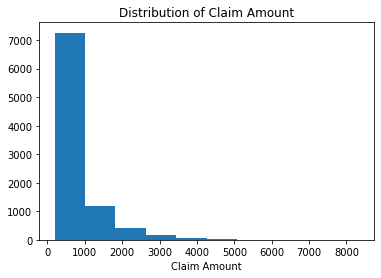

In [13]:
# matplotlib plots inline  
%matplotlib inline

# Plotting distribution of Claim Amount
plt.hist(df['Claim Amount'])
plt.xlabel('Claim Amount')
plt.title('Distribution of Claim Amount')

plt.show()


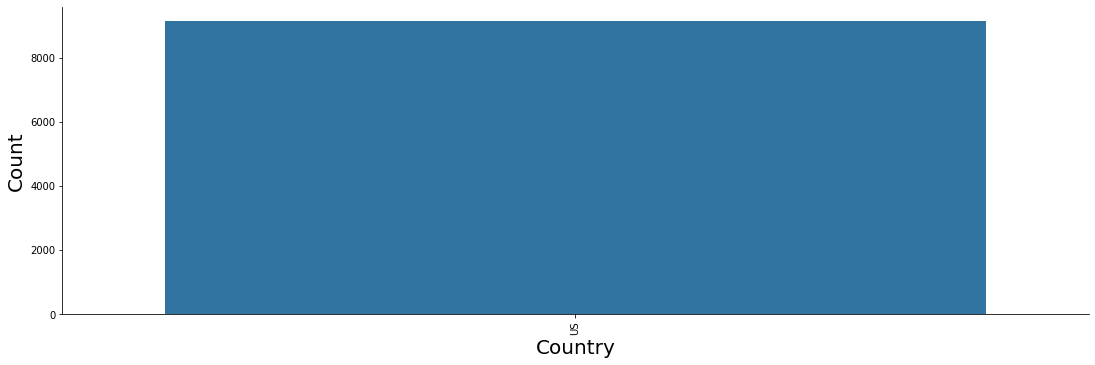

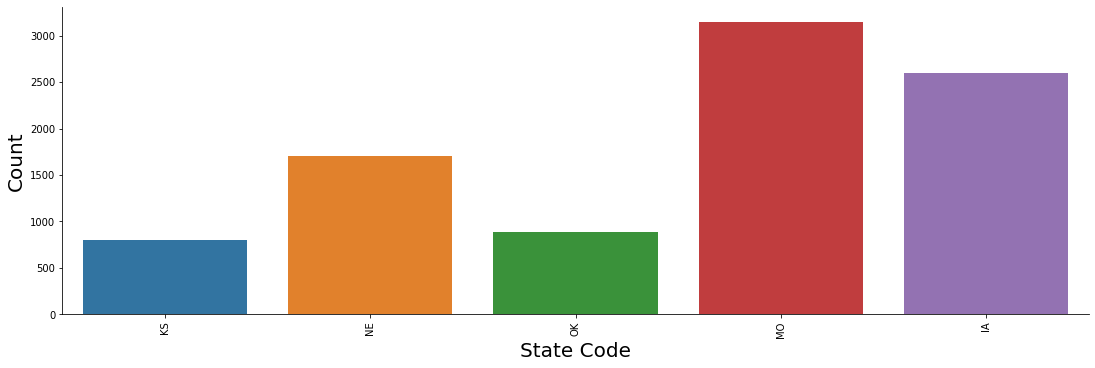

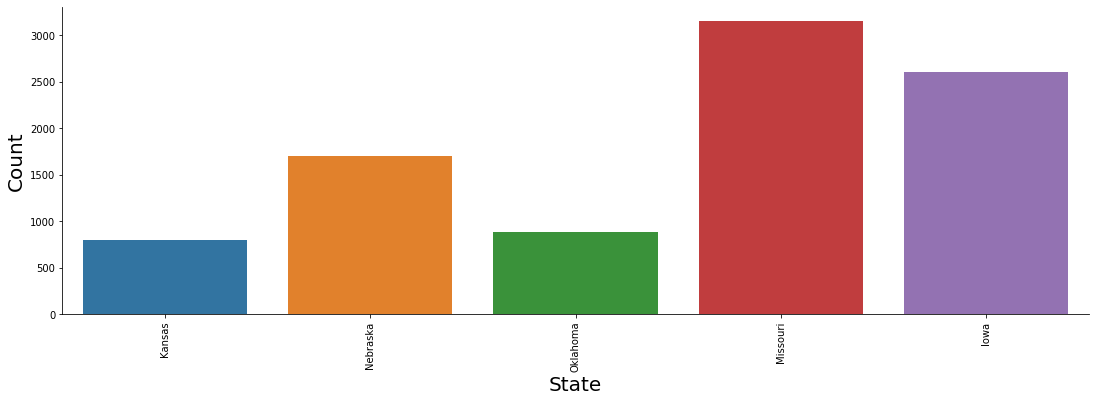

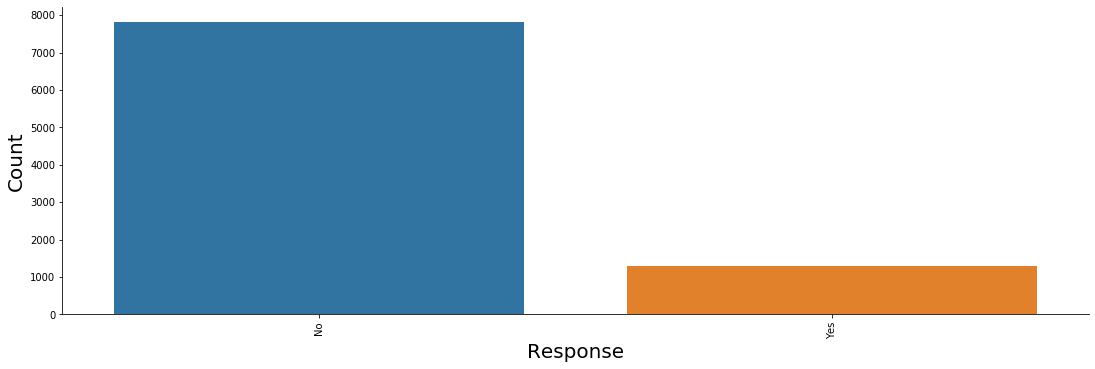

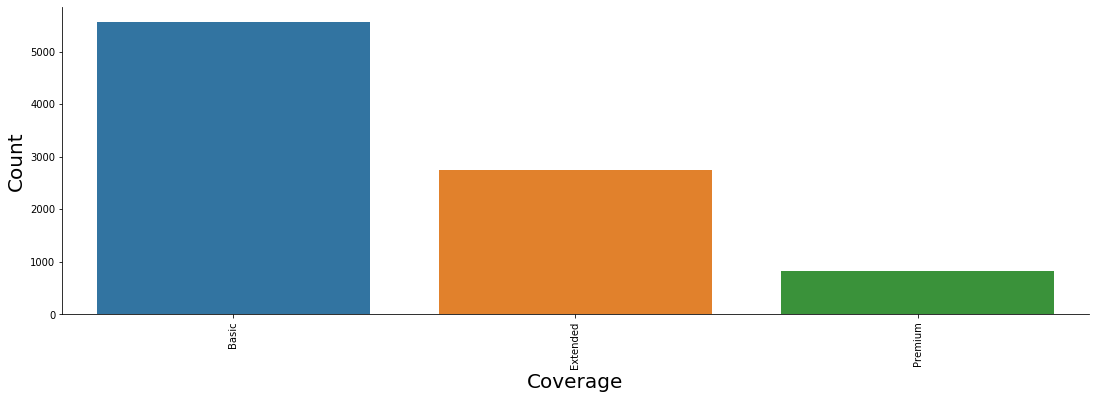

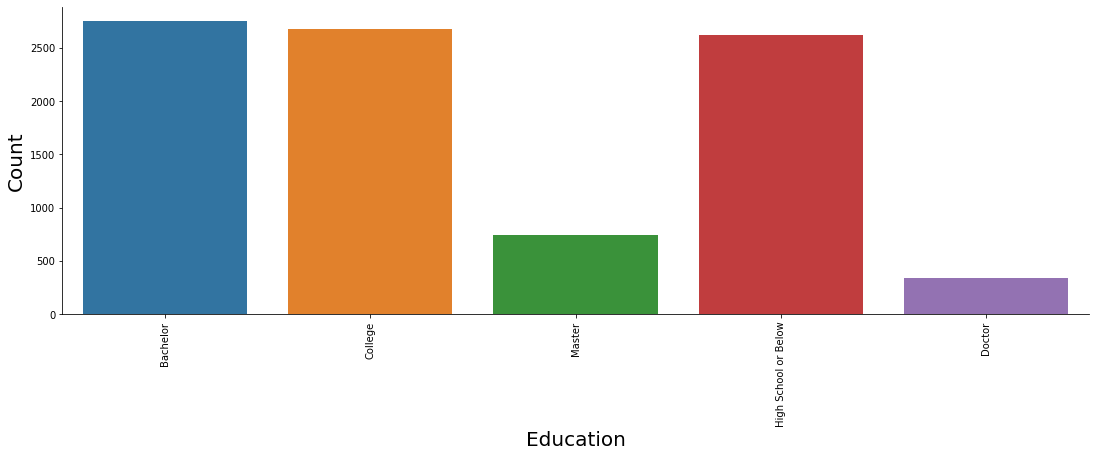

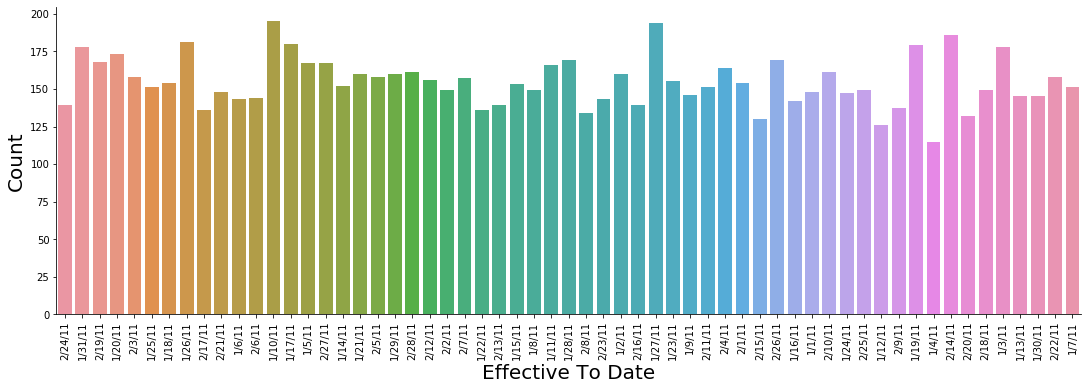

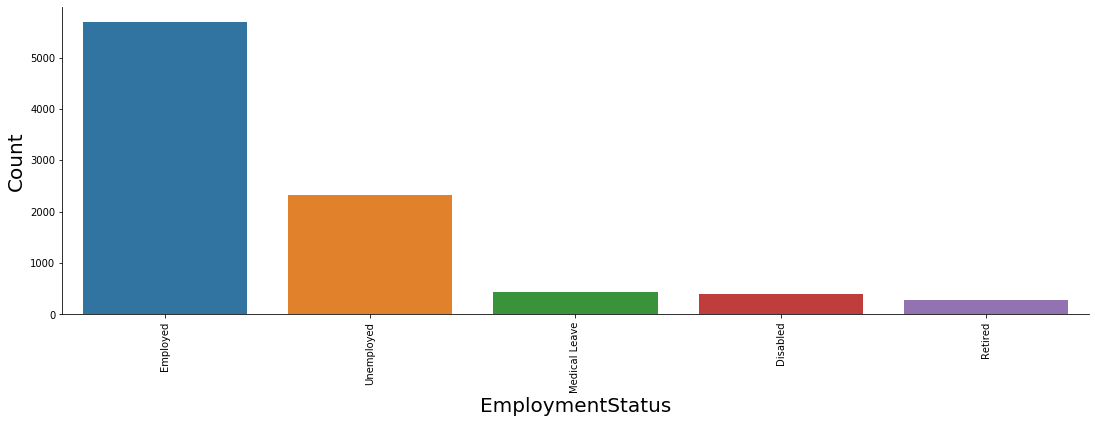

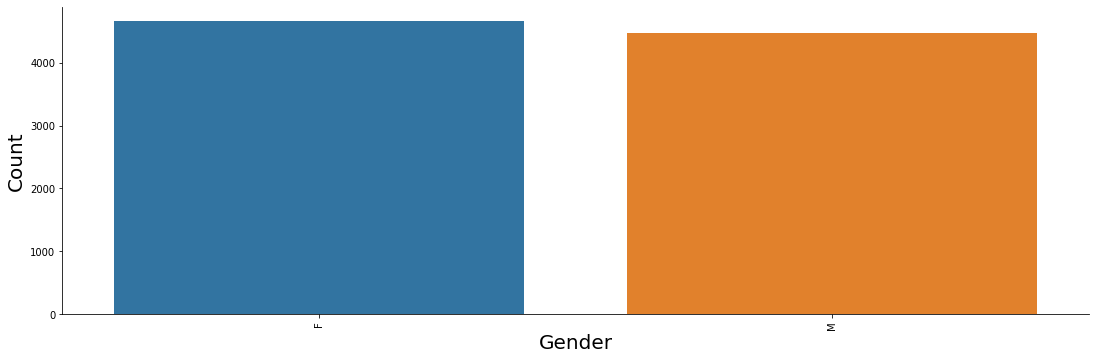

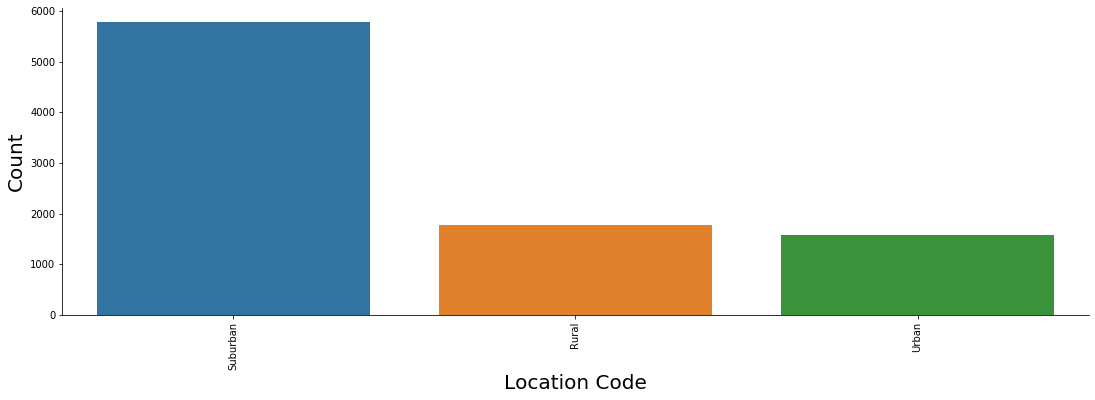

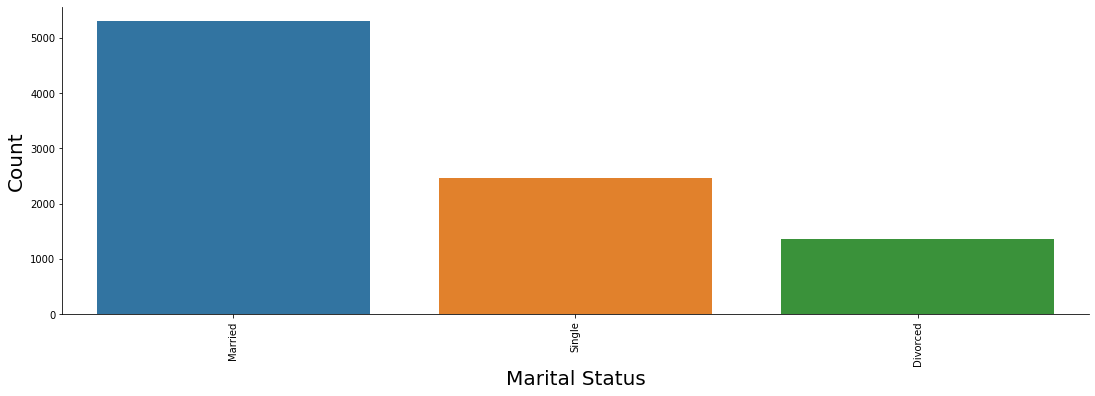

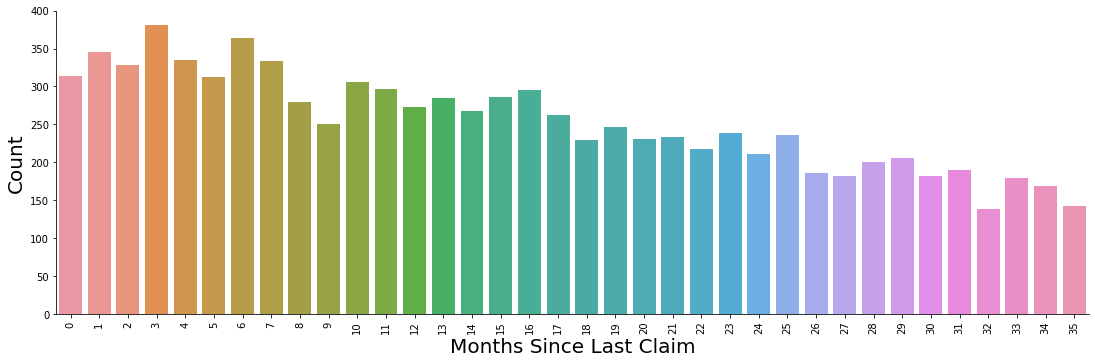

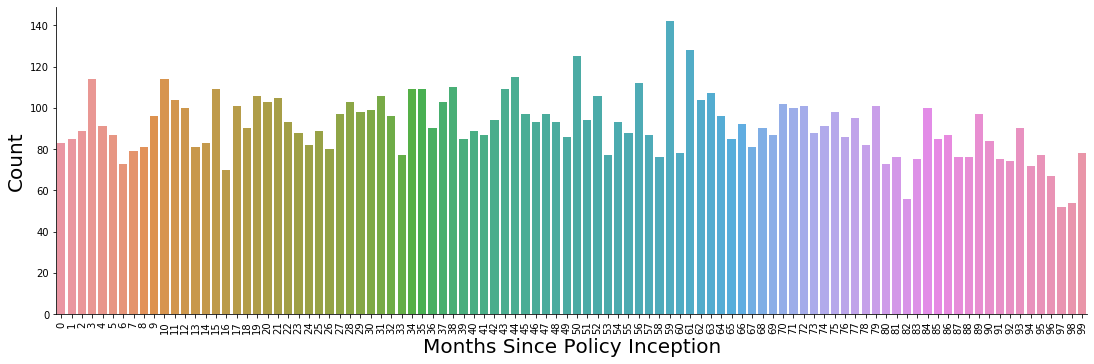

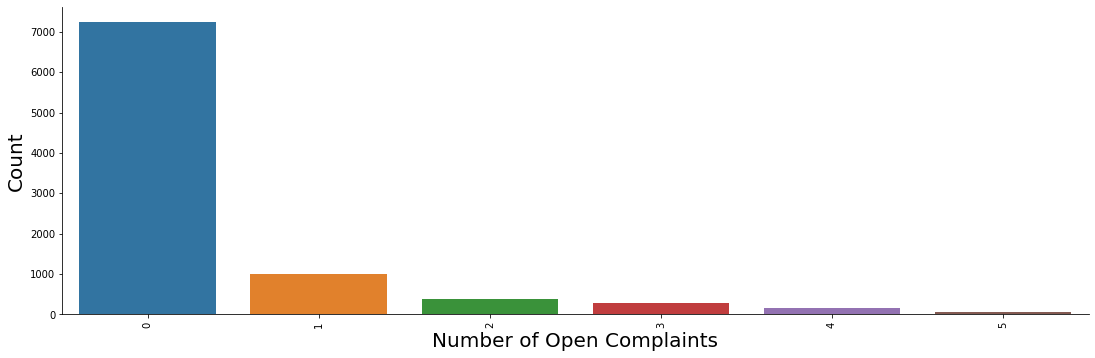

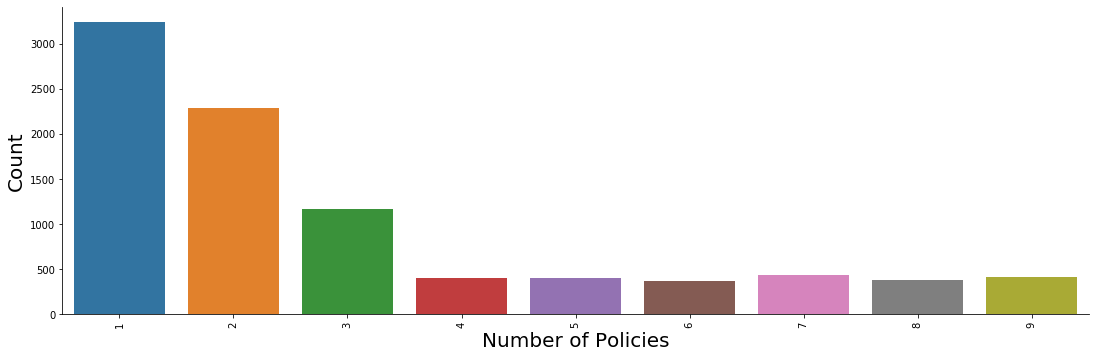

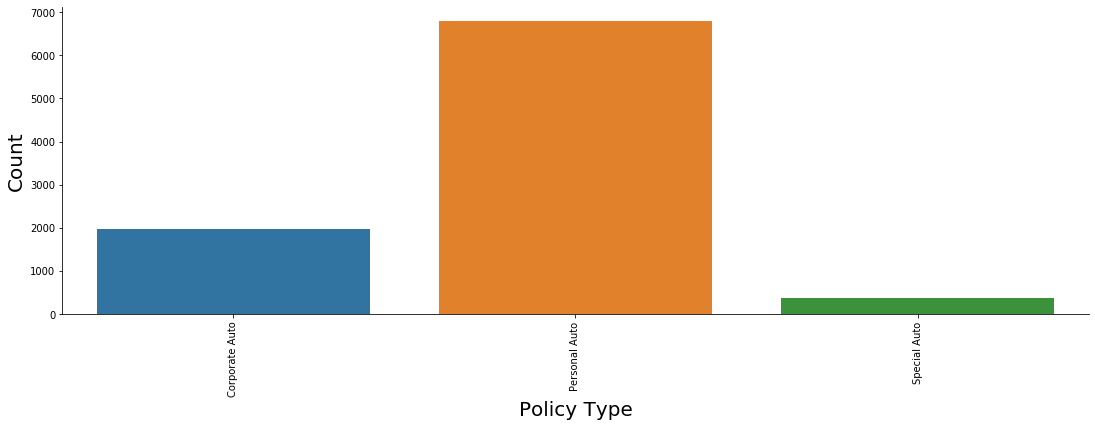

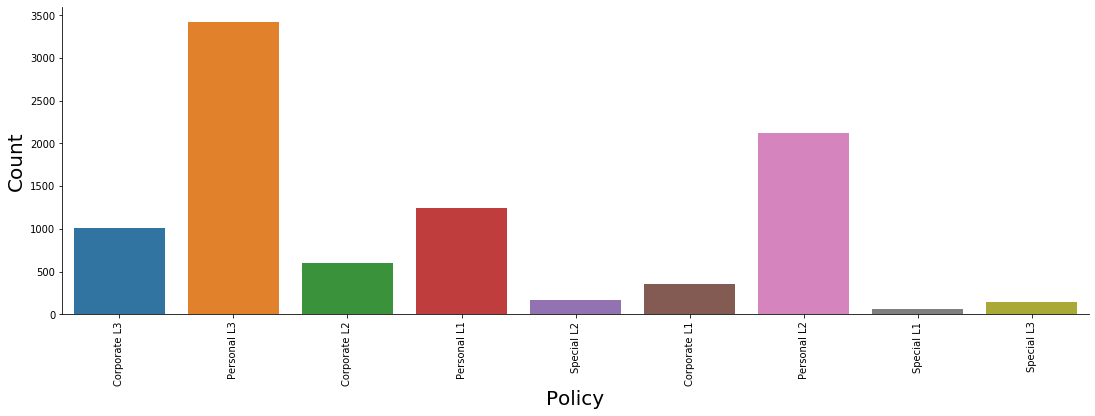

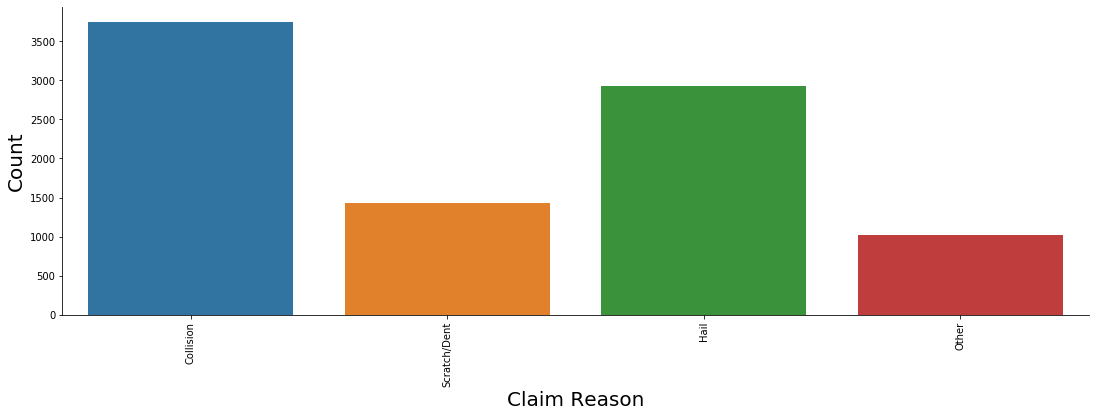

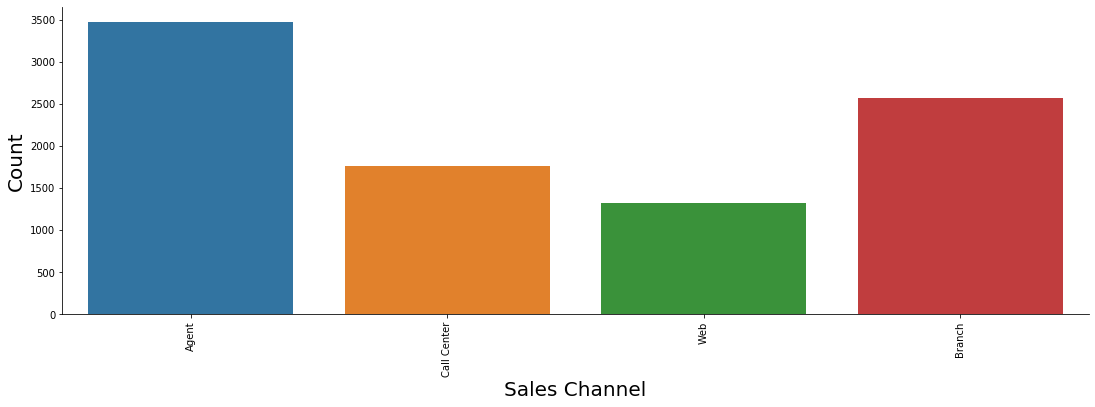

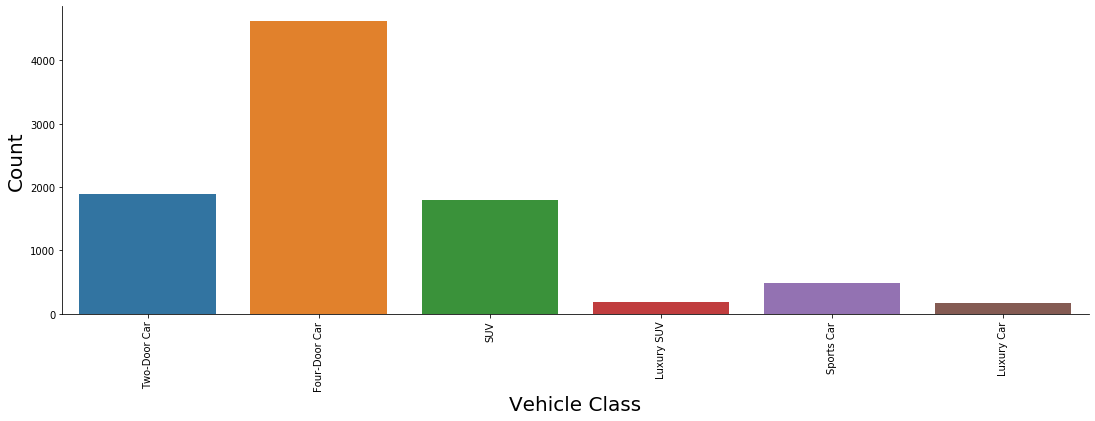

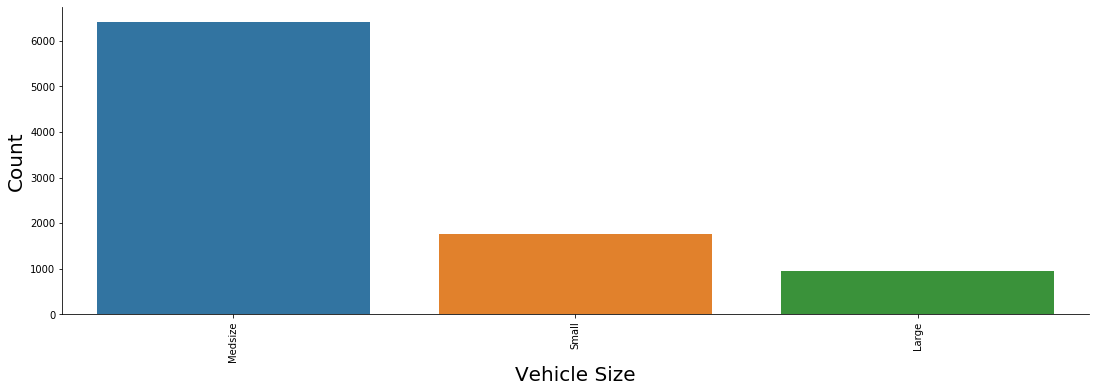

In [14]:
# For loop to plot counting Graph of Different Features
for i in df.drop(['Customer','Claim Amount','Total Claim Amount','Monthly Premium Auto','Income'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,)
    plt.xticks(rotation=90)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information From the Graph

1) All the persons are from US only.
2) More number of claims are from Missouri stae.
3) Number of Counts of Basic Coverage are more than Extended and Premium coverage.
4) Number of counts of Persons have Education= 'Bachelor' are more.
5) Number of counts of persons whose Employement Status is 'Employed'
6) Number of Female counts is more.
7) Number of counts for Suburban location code is more thamn rest.
8) Where Martial Status is Married, Number of Counts of Persons is more.
9) As 'Months since Last claim' increases number of person counts decreases.
10) Insurance claimers decreases as number of policies increases.
11) People chose Personal Auto policy more than rest.
12) Policy L3 have more number of customers.
13) More number of Persons mainly claims due to 'collision' 
14) More number of persons Take policies via Agents.
15) More number of persons take claim for 'Four-Door-Car'.
16) More number of persons claims for medsize vehicle.

Claim Amount                        AxesSubplot(0.125,0.657941;0.227941x0.222059)
Income                           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Monthly Premium Auto             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Months Since Last Claim             AxesSubplot(0.125,0.391471;0.227941x0.222059)
Months Since Policy Inception    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Number of Open Complaints        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Number of Policies                     AxesSubplot(0.125,0.125;0.227941x0.222059)
Total Claim Amount                  AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

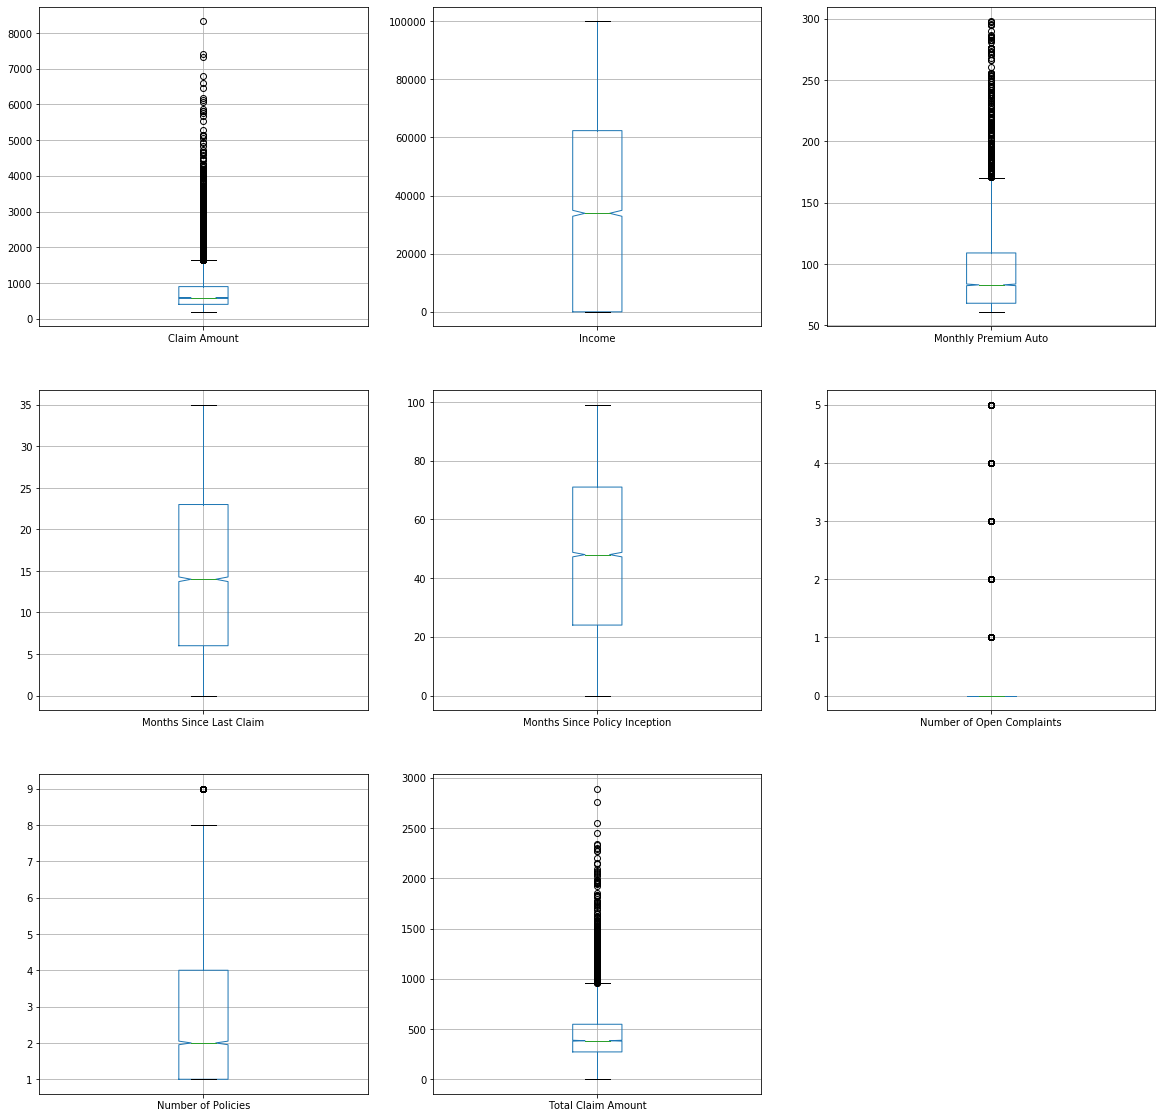

In [15]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002997D828088>,
      dtype=object)

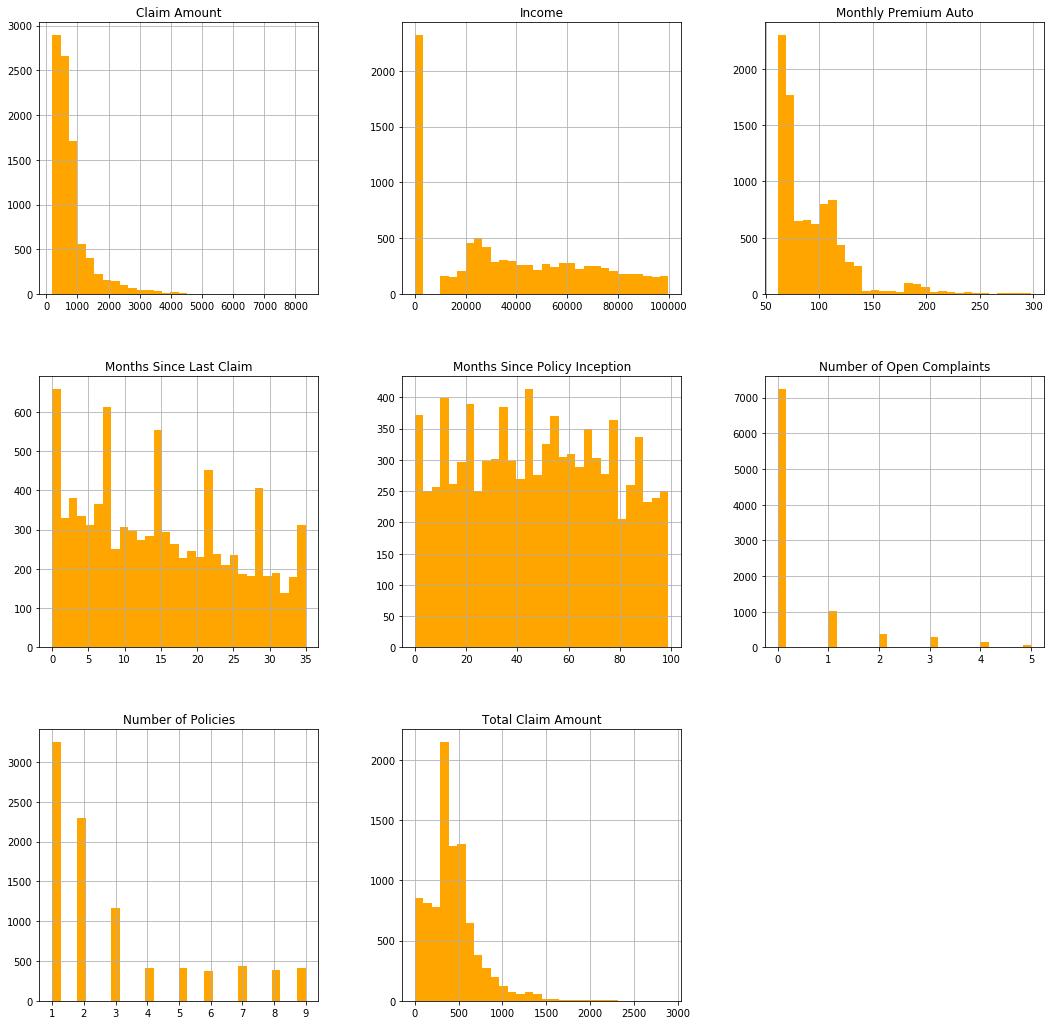

In [16]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(3,3),bins=30,color='orange')

# Bivariate  Analysis

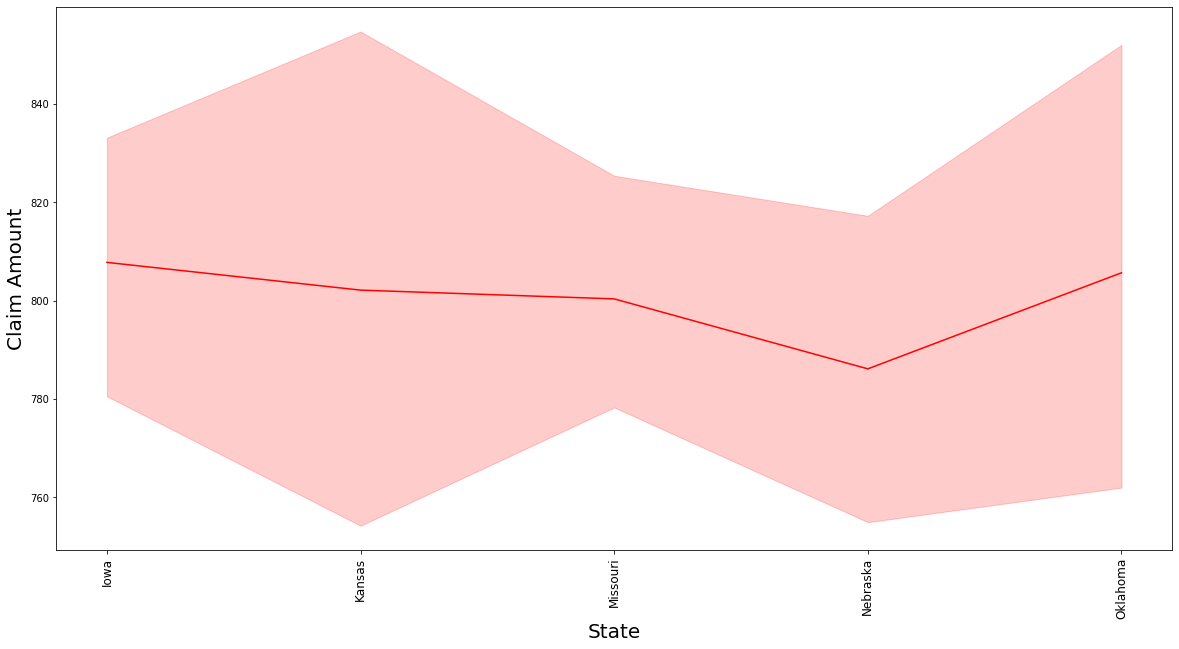

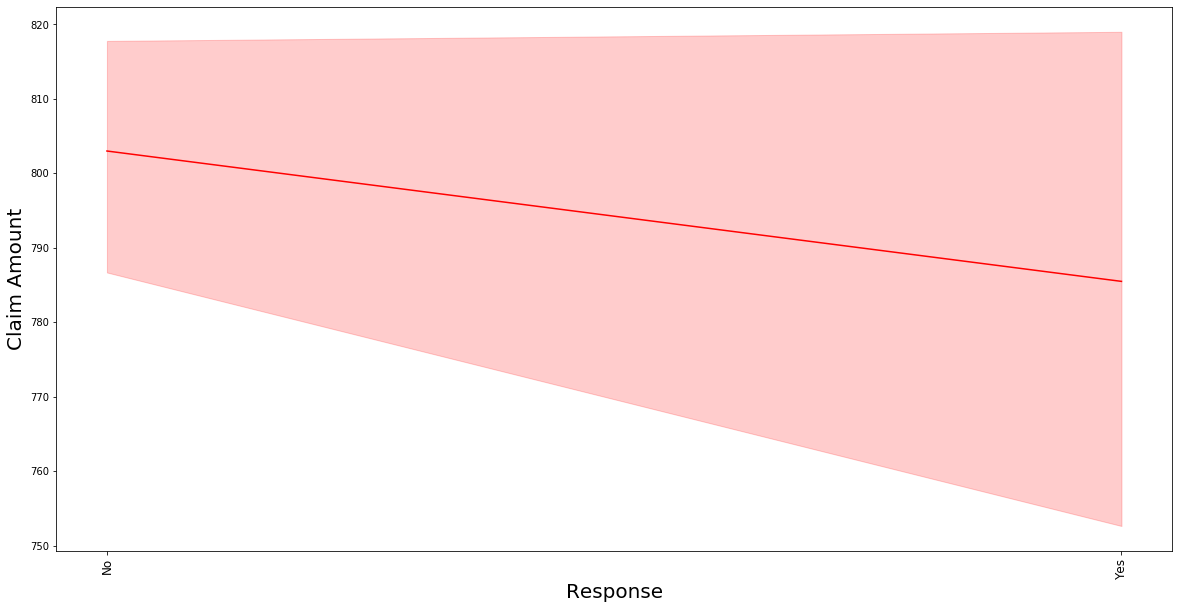

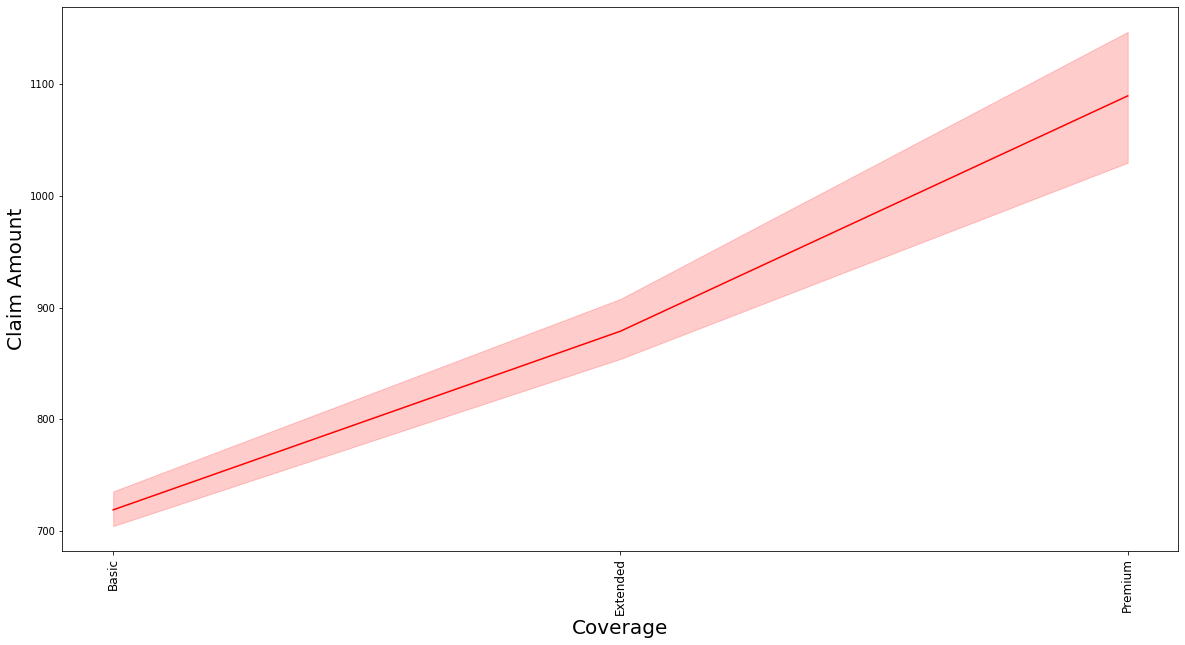

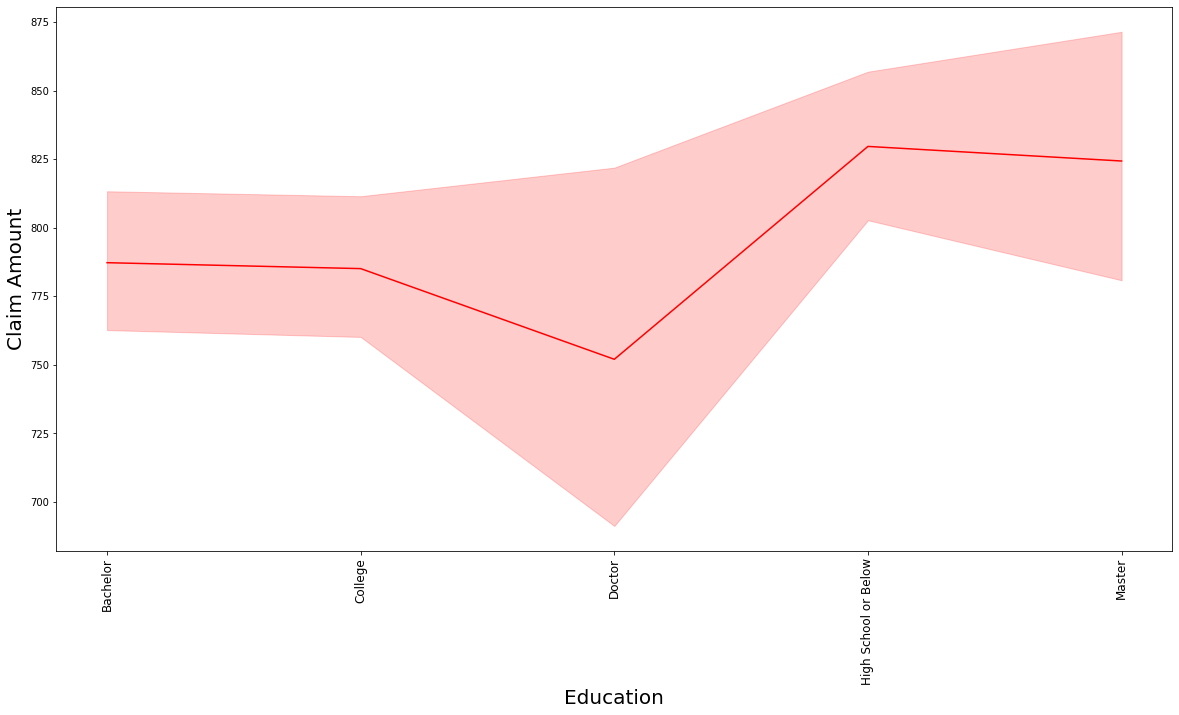

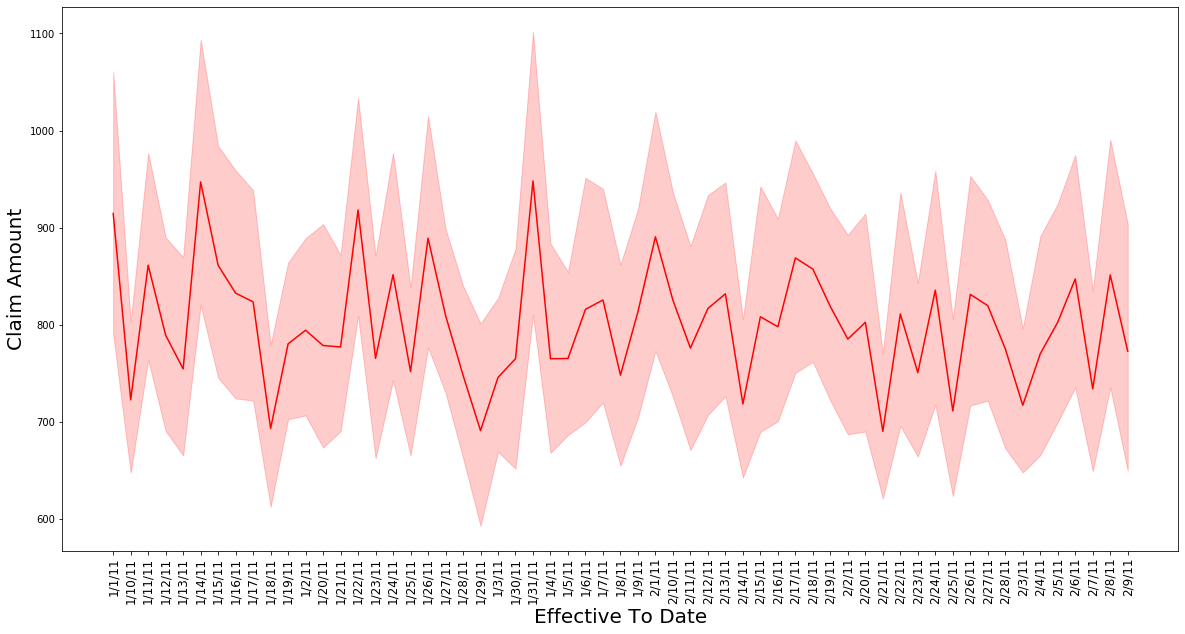

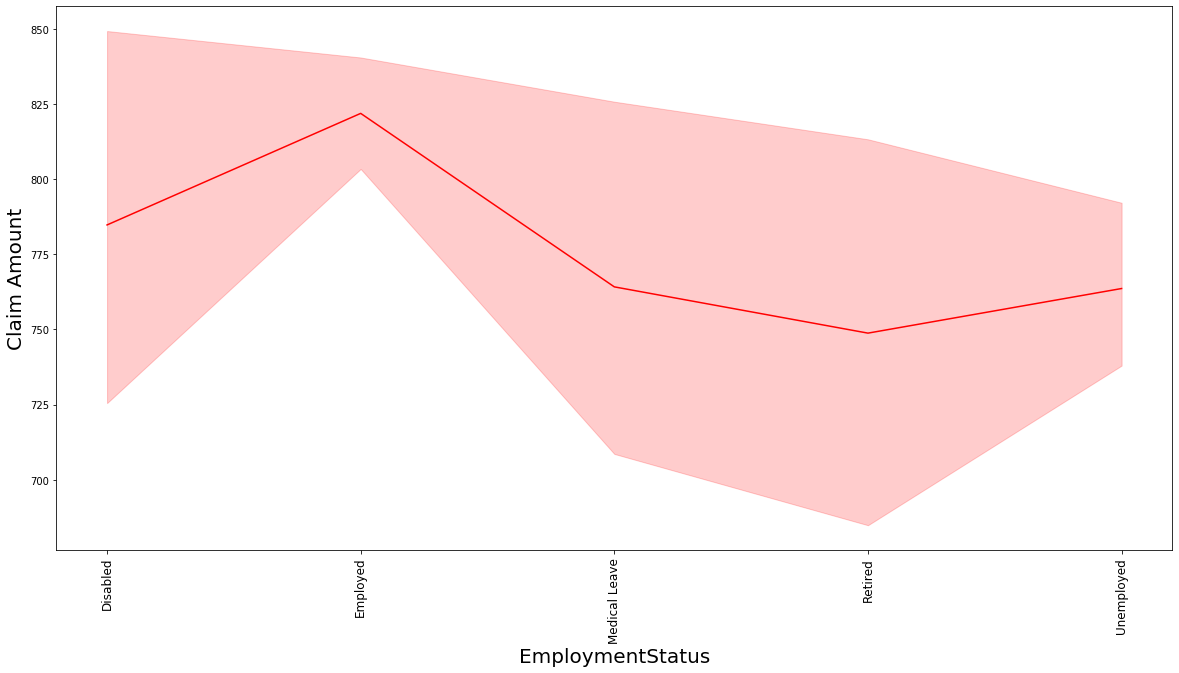

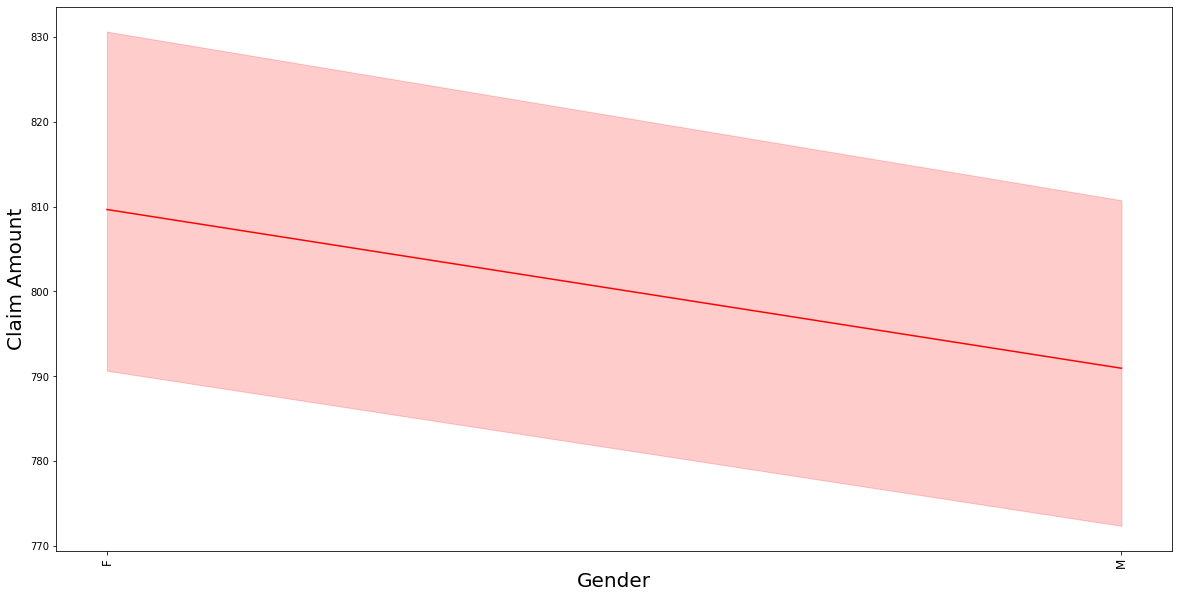

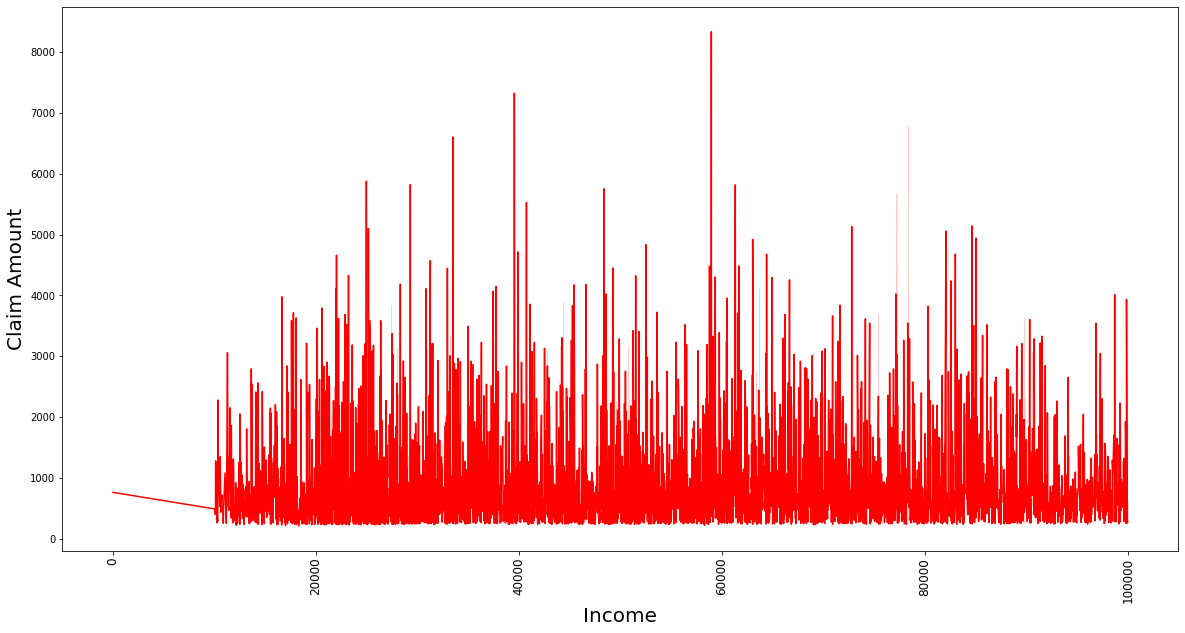

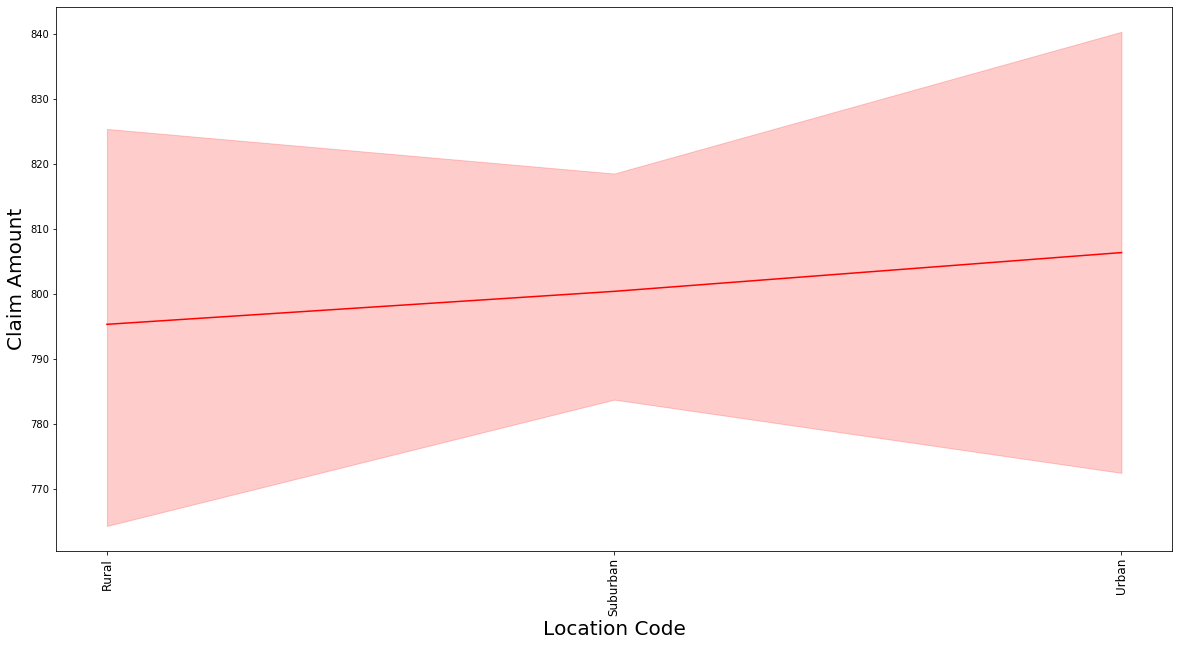

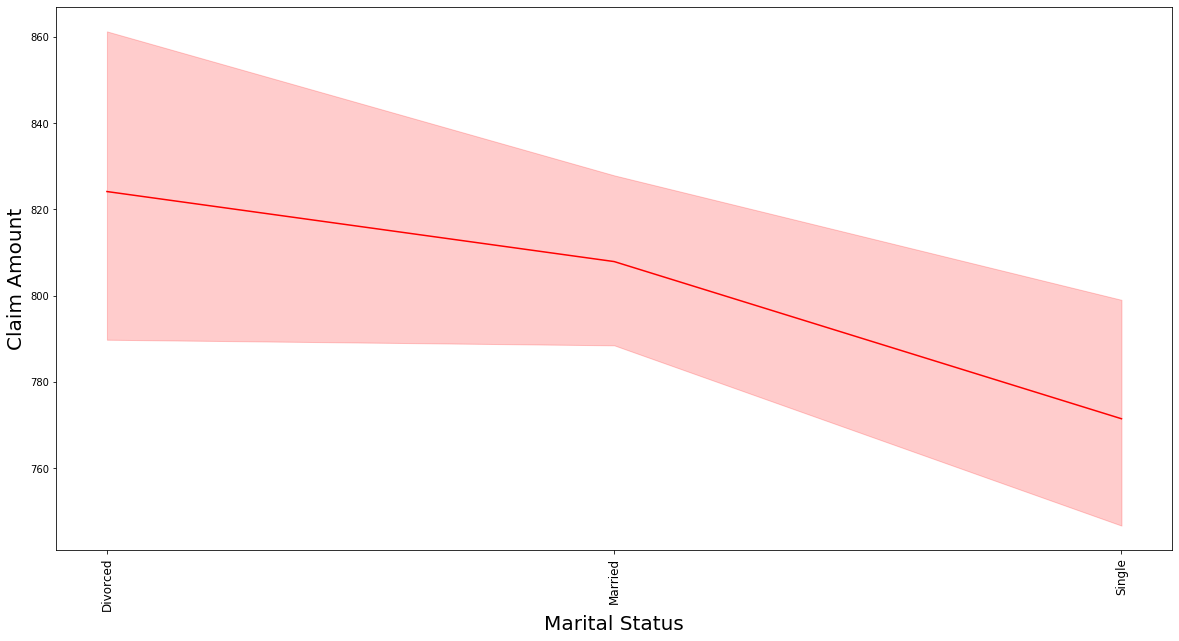

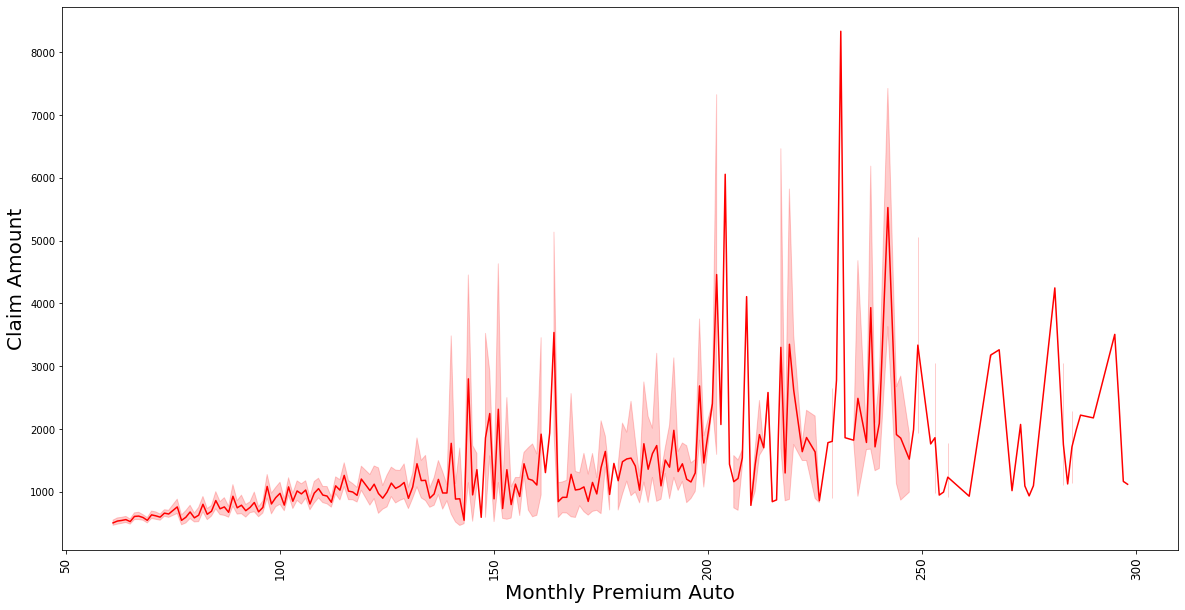

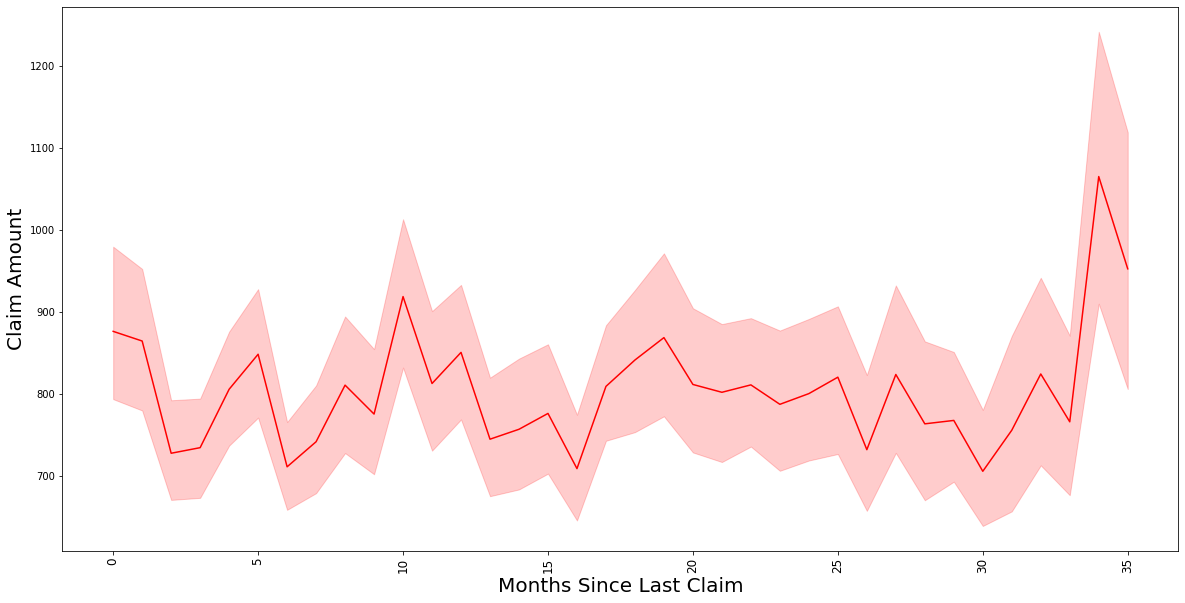

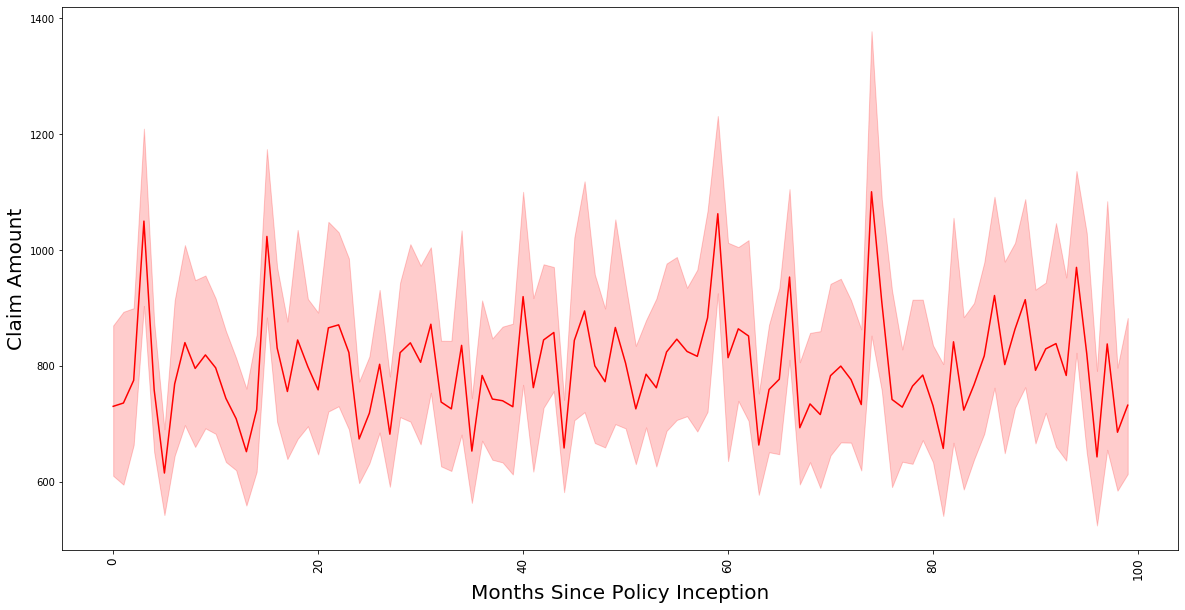

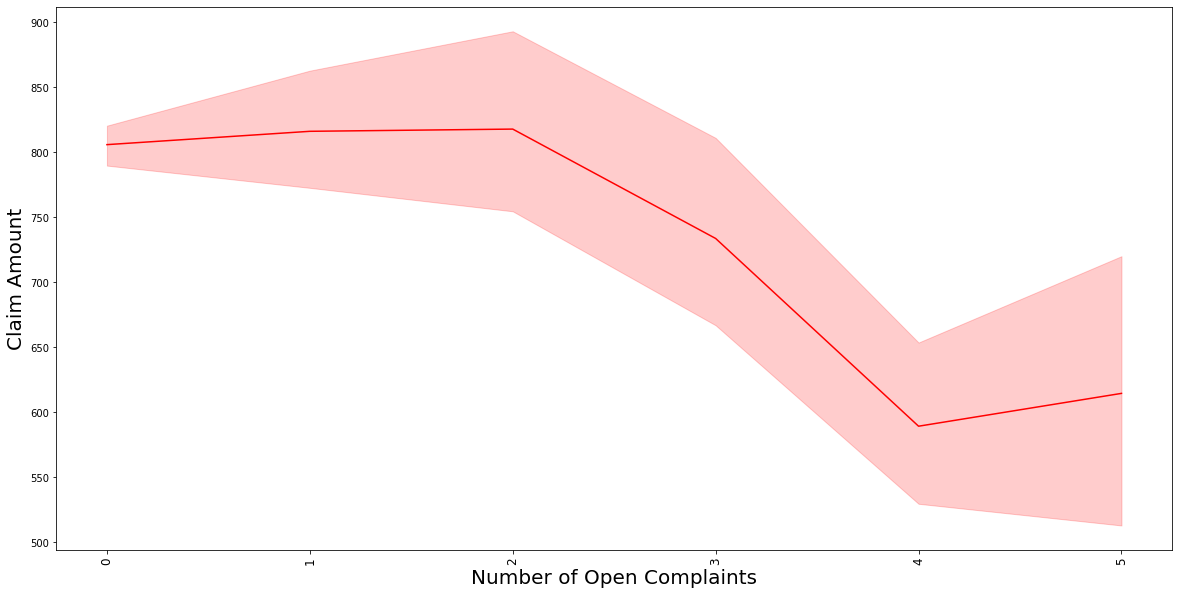

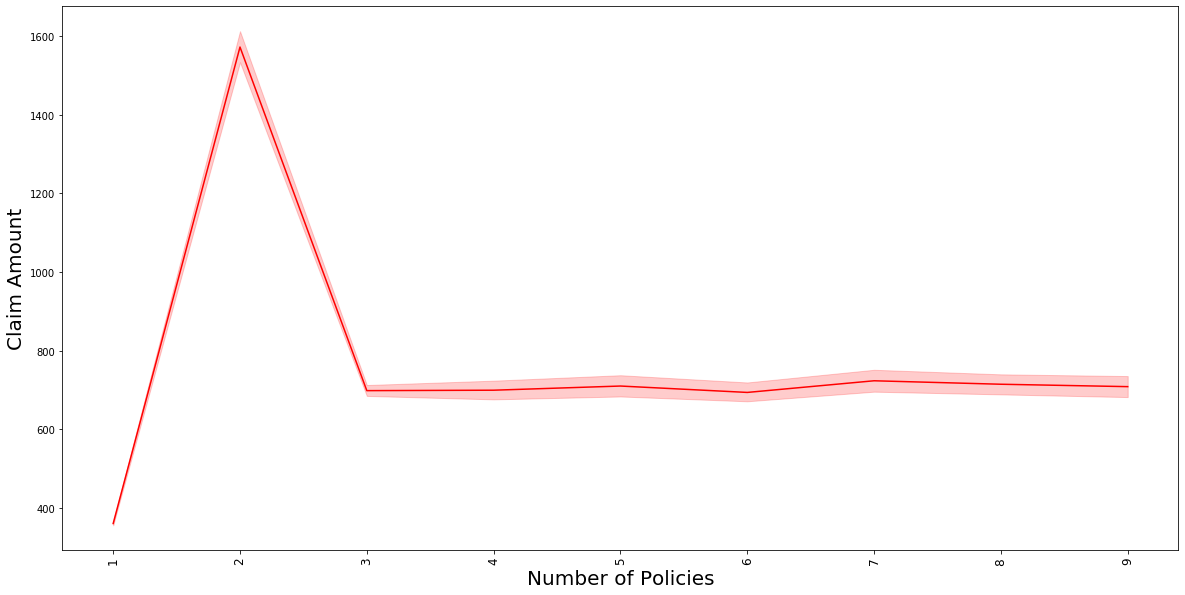

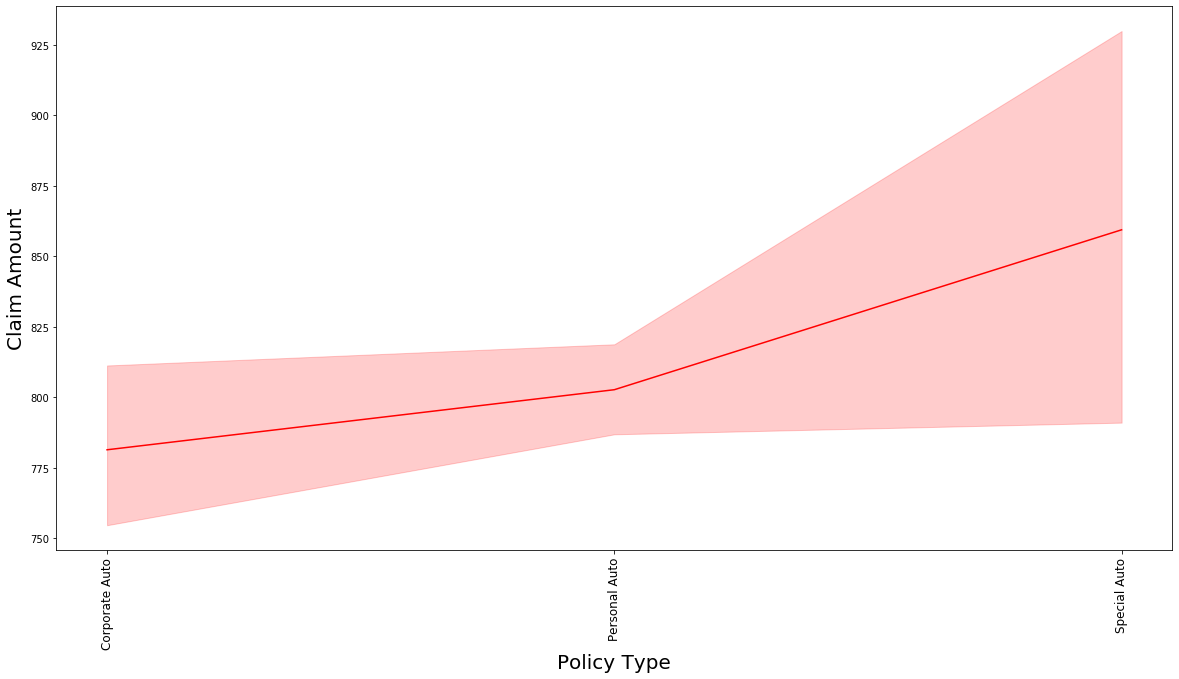

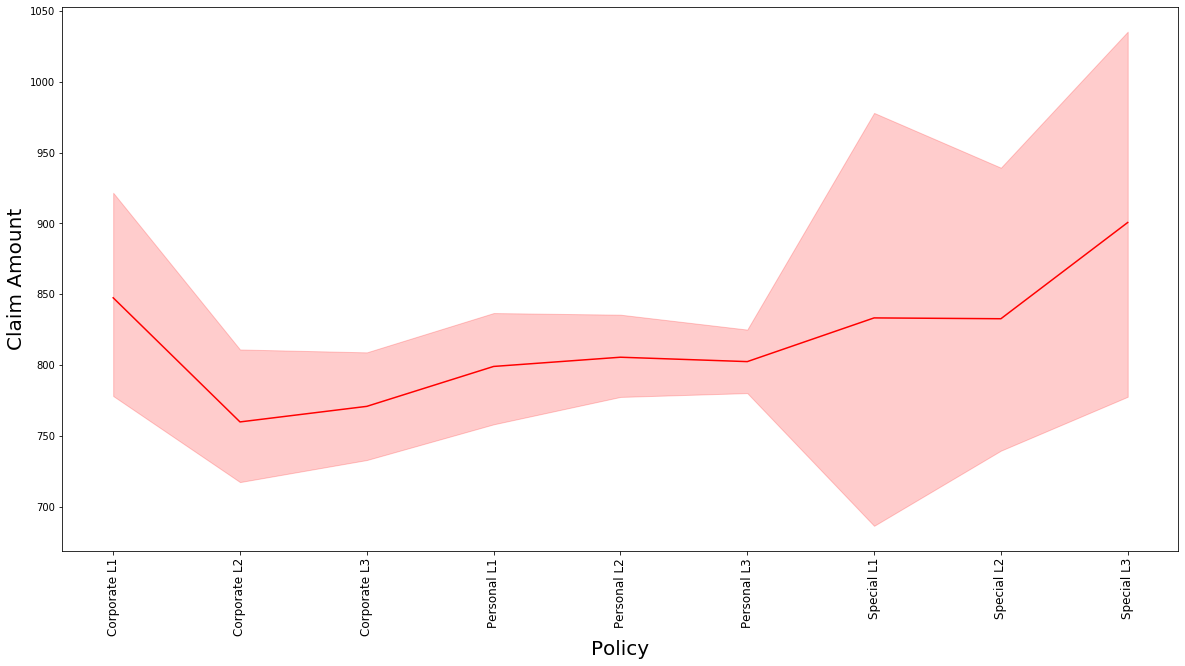

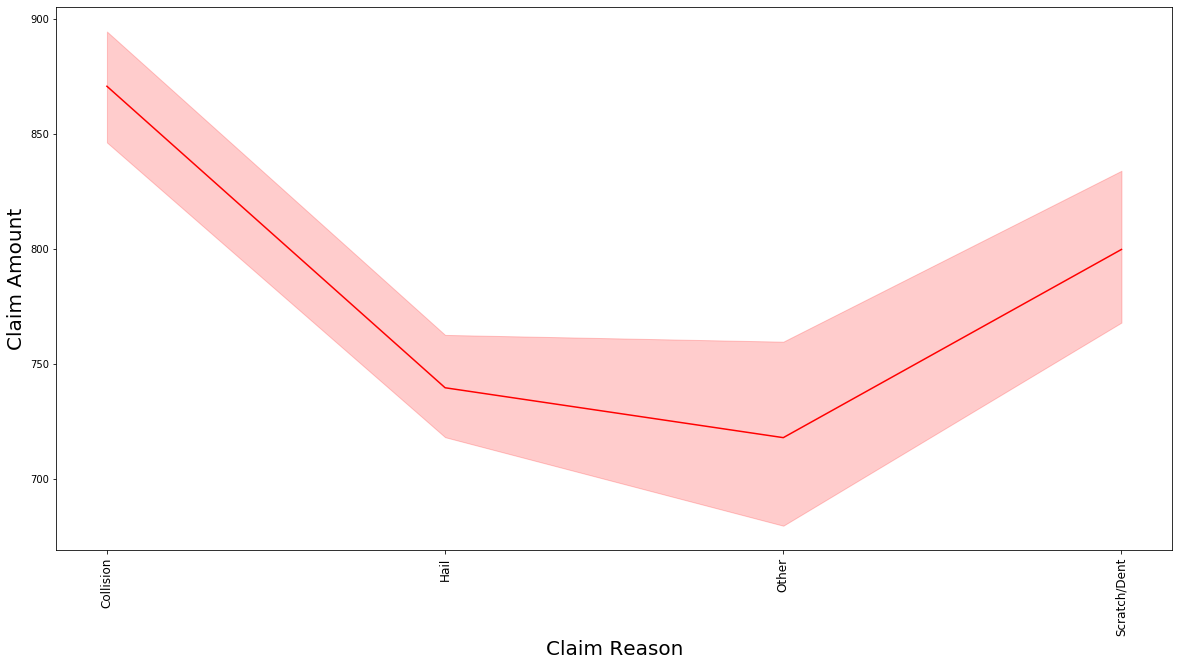

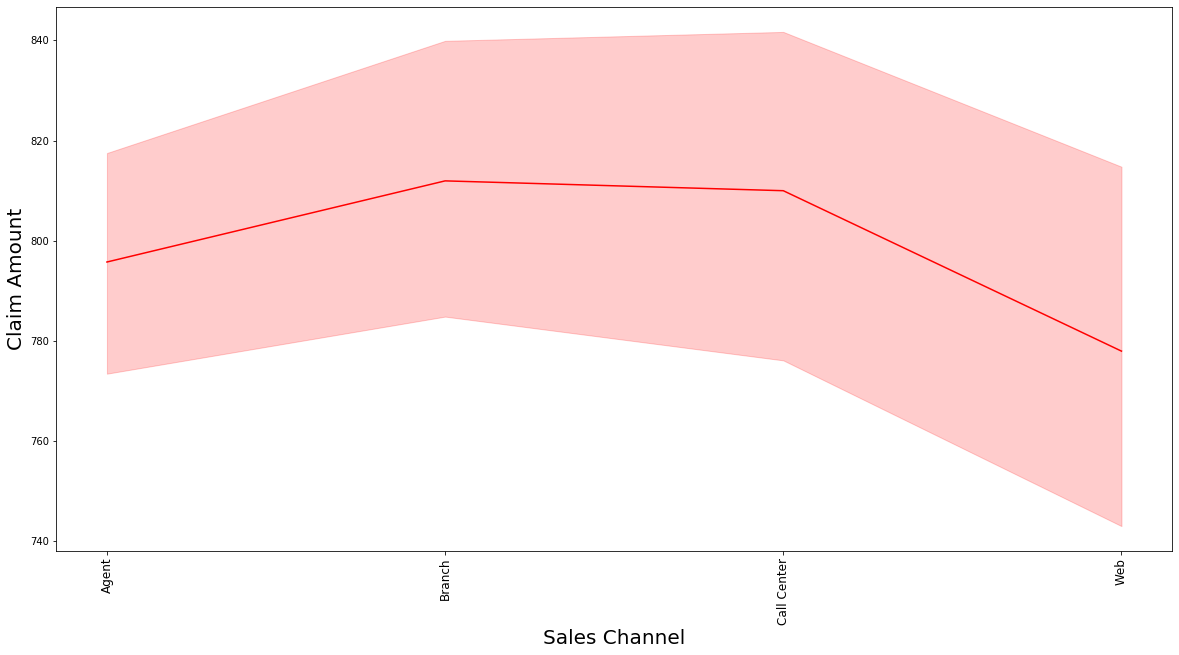

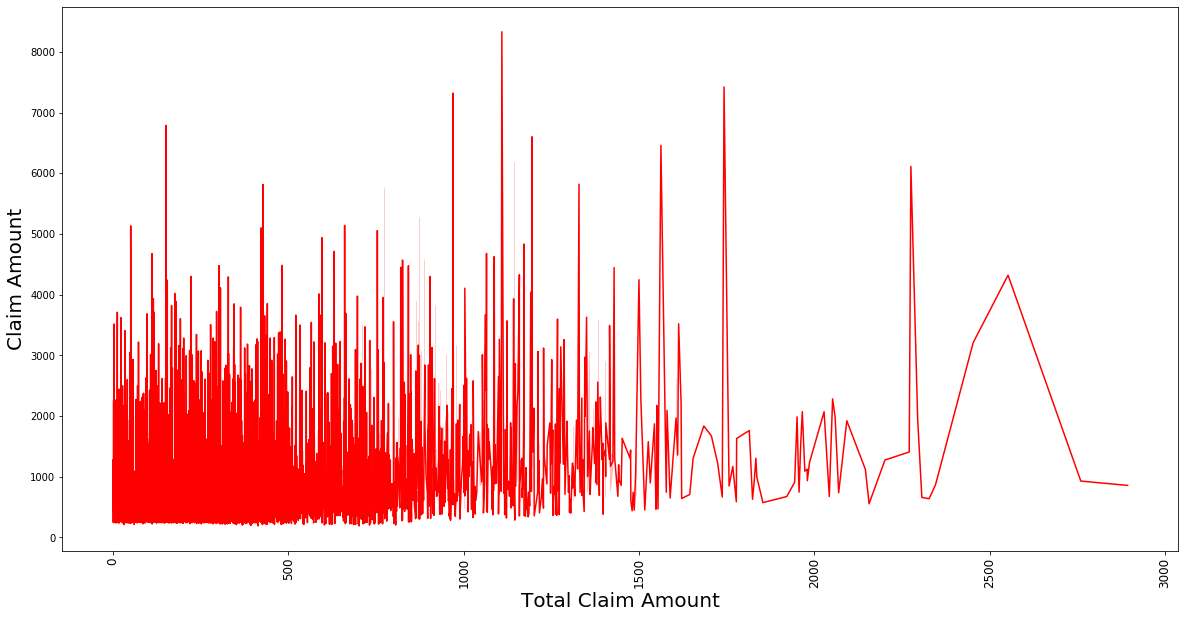

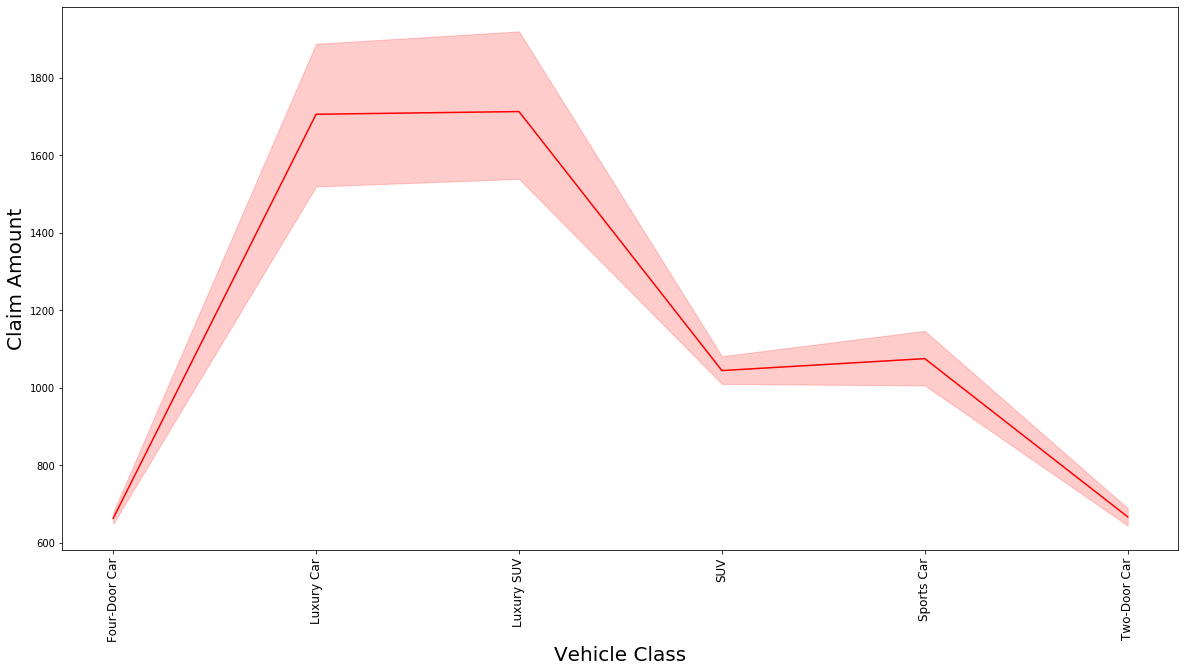

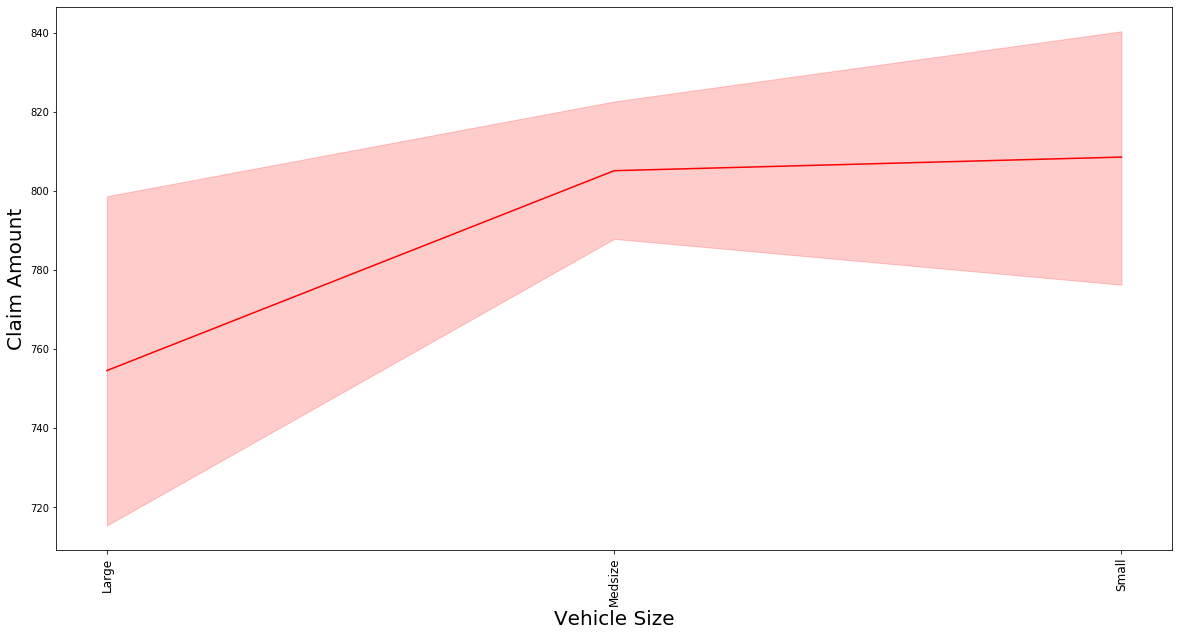

In [17]:
# For loop to plot graphs between Claim Amount and Rest Features('Customer','Country','State Code','Claim Amount')
for i in df.drop(['Customer','Country','State Code','Claim Amount'],axis=1).columns.values:
    plt.subplots(figsize=(20,10))
    sns.lineplot(x=i,
                data=df,
                y='Claim Amount',
                color='red')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Claim Amount',fontsize=20)
    plt.xlabel(i,fontsize=20)

# Information from the Graph:           

1) Oklohama state person's claims more amount.
2) Premium Coverage have more claim amount.
3) Education= 'High School or below' have more claim amount.
4) Employed persons have more claim Amount.
5) Females have more claim Amount.
6) Urban location have more claim amount.
7) Divorcees have more claim amount.
8) As monthly Premium Auto Increases Claim Amount also Increases.
9)  As 'Months since Last claim' increases claim amount also increases.
10) Claim Amount decreases as number of Open Complaints increases.
11) Special L3 Auto have more claim amount.
12) Call Centres sales chanel have more claim amount.
13) small vehicle size have more claim amount.

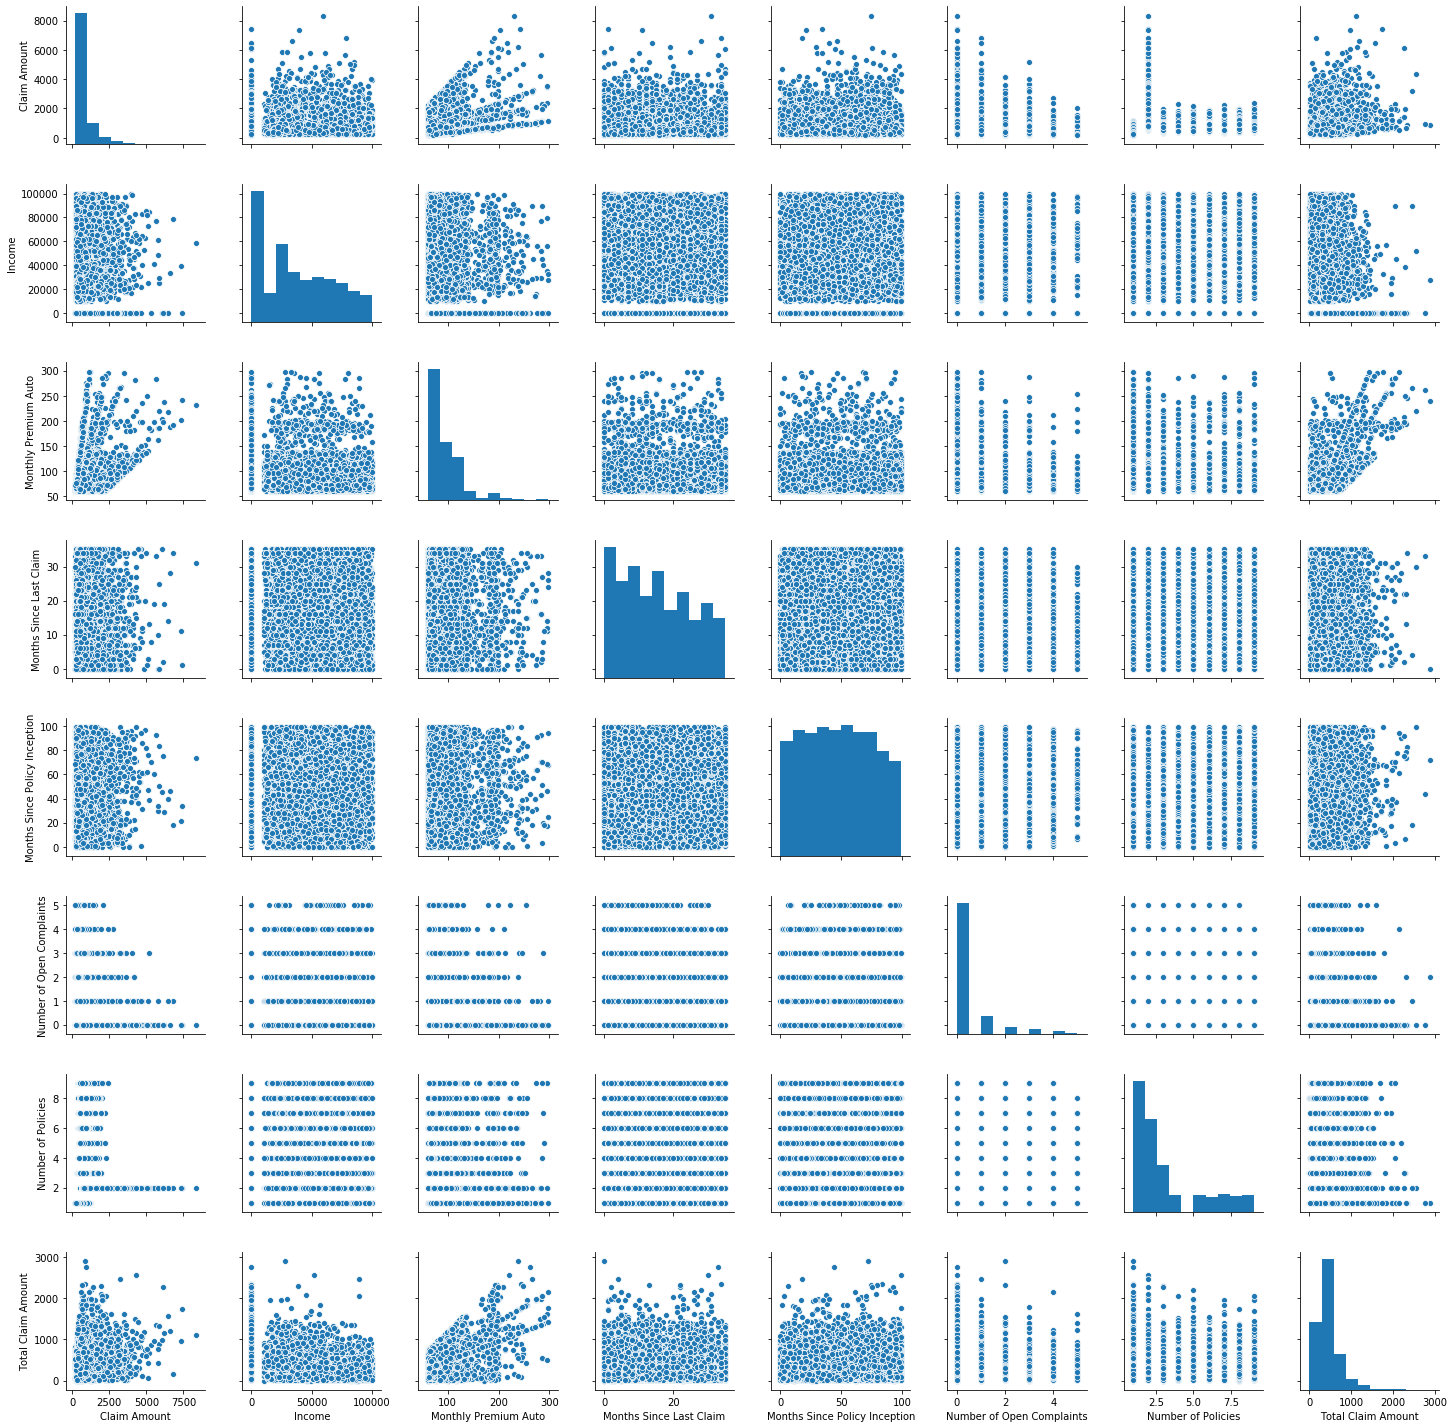

In [18]:
#plot pairplot
sns.pairplot(df)

In [19]:
#using labelencoder to convert all the object type columns to int
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=LabelEncoder().fit_transform(df[col])
df

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,0,1,1,276.351928,0,0,0,47,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,5946,0,3,3,697.953590,0,1,0,24,4,...,42,0,8,1,5,3,0,1131.464935,0,1
2,96,0,4,4,1288.743165,0,2,0,41,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,8016,0,2,2,764.586183,0,0,0,12,4,...,65,0,7,0,1,0,2,529.881344,3,1
4,2488,0,1,1,281.369258,0,0,0,52,1,...,44,0,1,1,3,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3857,0,2,2,2340.598798,0,0,0,32,1,...,89,0,2,1,3,1,3,198.234764,0,1
9130,5390,0,2,2,309.651122,1,1,1,34,1,...,28,0,1,0,2,0,1,379.200000,0,1
9131,6688,0,2,2,816.389043,0,1,0,55,4,...,37,3,2,0,1,0,1,790.784983,0,1
9132,7214,0,2,2,752.444244,0,1,1,52,1,...,3,0,3,1,4,3,1,691.200000,0,0


In [20]:
#lets check skewness
df.skew()

Customer                         0.000000
Country                          0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.733526
Sales Channel                    0.506774
Total Claim Amount               1

In [21]:
#lets remove the skewness
for i in df.drop(['Claim Amount'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])


In [22]:
df.skew()

Customer                         0.000000
Country                          0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         0.700634
Education                        0.333148
Effective To Date                0.033899
EmploymentStatus                 0.402923
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             1.013663
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        1.999011
Number of Policies               0.657633
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.226491
Sales Channel                    0.506774
Total Claim Amount              -0

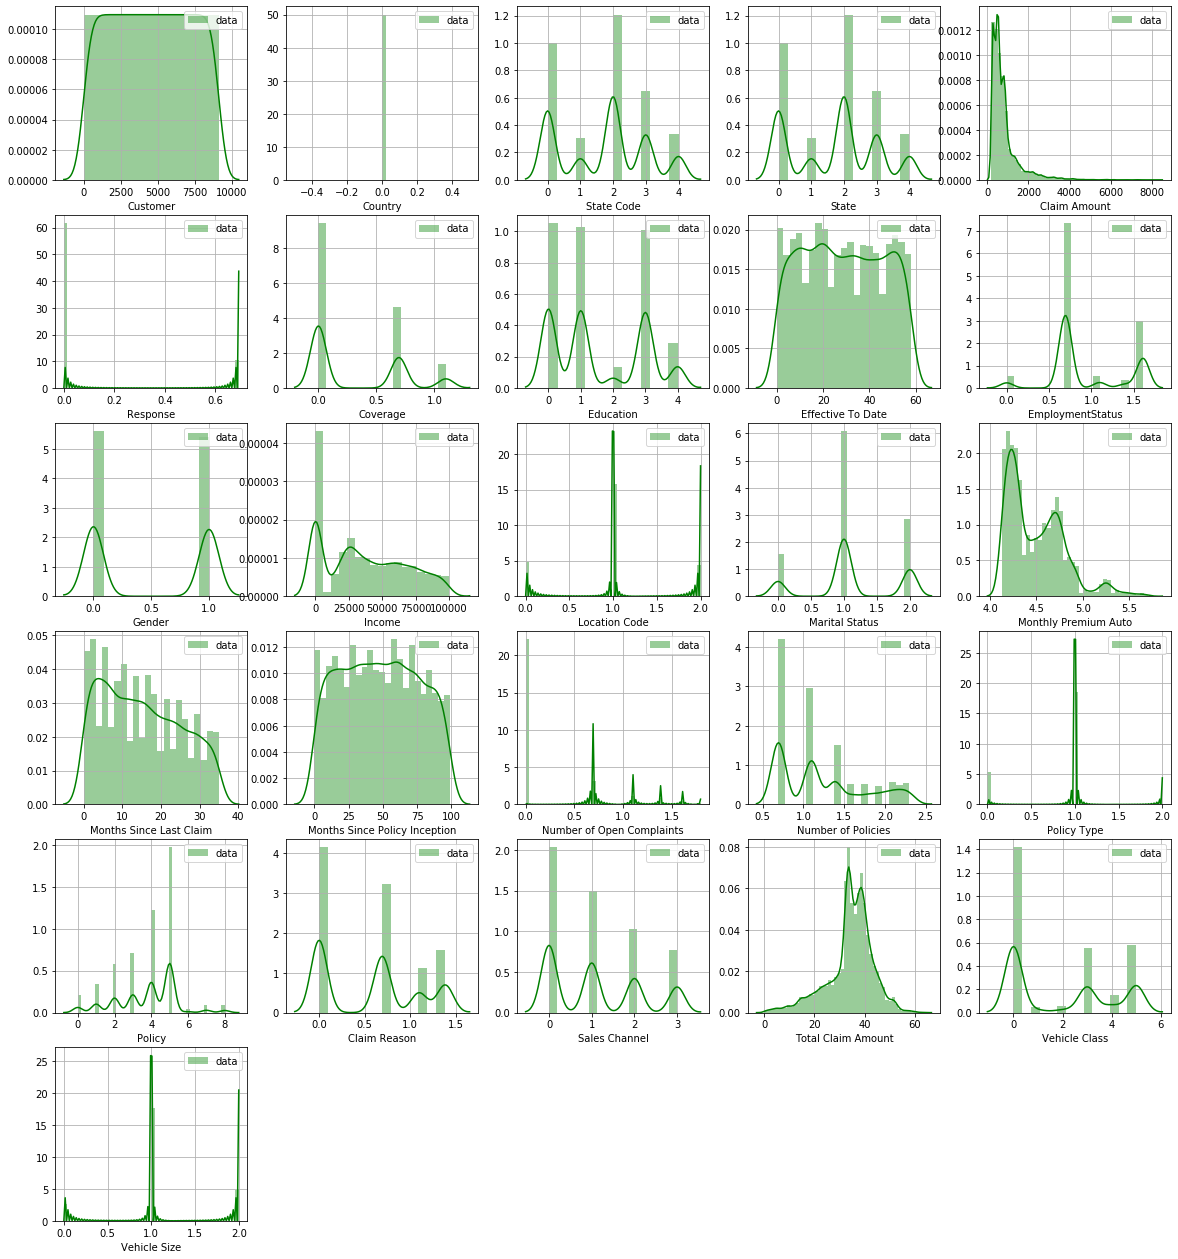

In [23]:
# Checking the Normal Distribution using distplot after removing outliers
plt.figure(figsize=(20,30))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(8,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

In [24]:
# Checking the correlation
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,1,nan,-0.0023,-0.0023,-0.029,0.023,-0.0071,0.0041,-0.0035,0.0085,0.018,-0.0087,0.016,0.0012,0.00024,0.012,-0.0074,-0.0099,0.0053,-0.019,-0.017,-0.0015,-0.0082,0.0084,-0.0034,0.00041
Country,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
State Code,-0.0023,nan,1,1,-0.0066,-0.0017,0.0084,0.0043,-0.00045,-0.0038,0.00054,0.0027,0.0014,-0.009,-0.00092,0.0092,-0.0045,0.015,-0.0076,-0.0091,-0.014,0.0026,0.0027,0.0026,-0.0048,-0.00096
State,-0.0023,nan,1,1,-0.0066,-0.0017,0.0084,0.0043,-0.00045,-0.0038,0.00054,0.0027,0.0014,-0.009,-0.00092,0.0092,-0.0045,0.015,-0.0076,-0.0091,-0.014,0.0026,0.0027,0.0026,-0.0048,-0.00096
Claim Amount,-0.029,nan,-0.0066,-0.0066,1,-0.0089,0.16,0.026,-0.013,-0.032,-0.014,0.024,0.0049,-0.026,0.39,0.012,0.0094,-0.029,0.11,0.02,0.015,-0.066,-0.0039,0.16,0.082,0.017
Response,0.023,nan,-0.0017,-0.0017,-0.0089,1,0.00028,0.00028,-0.043,-0.0087,0.0044,0.012,0.0017,-0.095,0.011,-0.017,0.003,-0.014,-0.029,0.0011,-0.0015,-0.13,-0.087,0.05,0.021,-0.051
Coverage,-0.0071,nan,0.0084,0.0084,0.16,0.00028,1,0.023,0.0057,0.0071,-0.016,-0.014,-0.018,0.0018,0.51,0.017,0.0093,-0.0064,-0.017,0.0028,-0.0012,-0.045,-0.029,0.21,-0.018,-0.0057
Education,0.0041,nan,0.0043,0.0043,0.026,0.00028,0.023,1,0.0013,-0.028,0.0022,0.019,-0.012,0.0057,0.028,0.003,0.0041,-0.021,0.0082,0.012,0.011,0.059,-0.005,0.015,0.01,-0.0055
Effective To Date,-0.0035,nan,-0.00045,-0.00045,-0.013,-0.043,0.0057,0.0013,1,-0.00094,-0.013,-0.00053,-0.002,-0.014,0.0077,-0.0039,0.0083,-0.0091,0.0042,-0.0075,-0.0066,0.00063,-0.011,-0.0036,-0.019,0.0054
EmploymentStatus,0.0085,nan,-0.0038,-0.0038,-0.032,-0.0087,0.0071,-0.028,-0.00094,1,0.04,-0.66,0.015,0.3,0.0083,0.0087,0.015,0.011,0.0067,-0.0029,0.00043,-0.11,-0.02,0.29,-0.0053,-0.012


(26.0, 0.0)

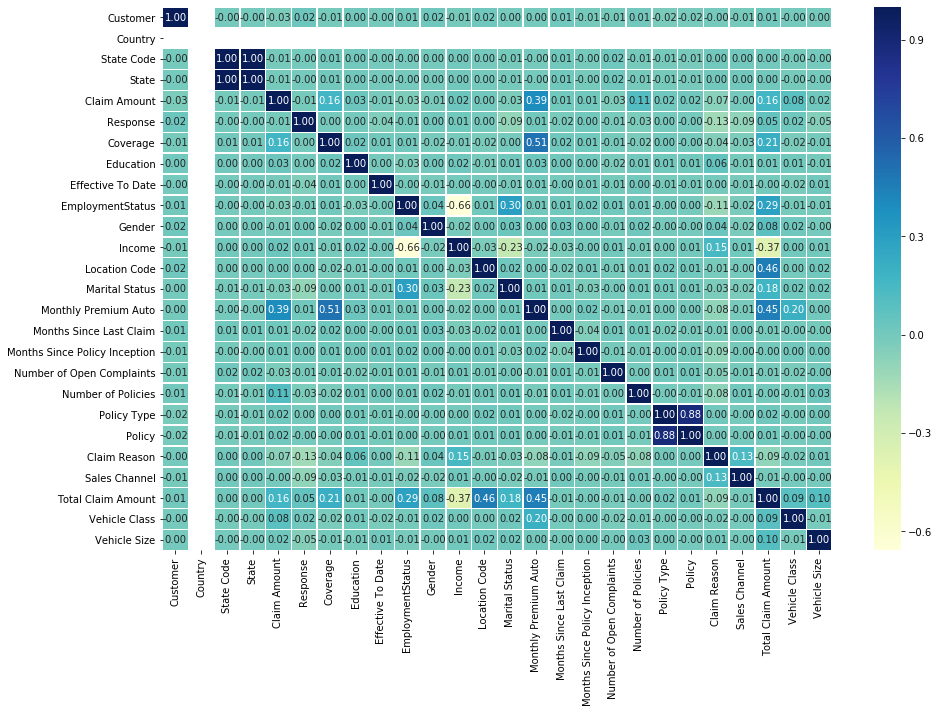

In [25]:
# Plotting Heatmap for Correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [26]:
#Feature Removal

#State and State Code are giving similar information
#All rows are for one country US so we can drop this column as it is constant
#drop customer and Effective To Date
print(f"Number of columns before deleting: {df.shape[1]}")
del_cols = ['State Code','Country','Customer','Effective To Date']
df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 26
Number of columns after deleting: 22


# Modeling


In [27]:
# Split data into X and y
X = df.drop("Claim Amount", axis=1)

y = df["Claim Amount"]

In [28]:
# Independent variables (no target column)
X.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,0.0,0.000000,0,0.693147,0,56274,1,1,4.248495,...,5,0.0,0.693147,0,2,0.000000,0,35.466170,5,1
1,3,0.0,0.693147,0,1.609438,0,0,1,2,4.553877,...,42,0.0,2.197225,1,5,1.386294,0,49.451160,0,1
2,4,0.0,1.098612,0,0.693147,0,48767,1,1,4.691348,...,38,0.0,1.098612,1,5,0.000000,0,40.210714,5,1
3,2,0.0,0.000000,0,1.609438,1,0,1,1,4.672829,...,65,0.0,2.079442,0,1,0.000000,2,39.369834,3,1
4,1,0.0,0.000000,0,0.693147,1,43836,0,2,4.304065,...,44,0.0,0.693147,1,3,0.000000,0,24.358322,0,1


In [29]:
# Target variable
y


0        276.351928
1        697.953590
2       1288.743165
3        764.586183
4        281.369258
           ...     
9129    2340.598798
9130     309.651122
9131     816.389043
9132     752.444244
9133     261.183687
Name: Claim Amount, Length: 9134, dtype: float64

In [30]:
#checking shape of input variable
X.shape

(9134, 21)

In [31]:
#checking shape of target variable
y.shape

(9134,)

In [32]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,-0.550690,-0.408822,-0.770998,-1.124597,-0.544213,-0.980269,0.612827,0.034524,-0.188771,-0.805379,...,-1.543287,-0.473012,-1.013459,-1.735273,-1.119497,-1.074582,-1.031138,0.114851,1.499181,-0.166682
1,0.973322,-0.408822,0.968695,-1.124597,1.514006,-0.980269,-1.239617,0.034524,1.381572,0.196188,...,-0.217334,-0.473012,1.842561,0.365732,0.748626,1.573530,-1.031138,1.646418,-0.912924,-0.166682
2,1.735328,-0.408822,1.986350,-1.124597,-0.544213,-0.980269,0.365710,0.034524,-0.188771,0.647055,...,-0.360680,-0.473012,-0.243541,0.365732,0.748626,-1.074582,-1.031138,0.634450,1.499181,-0.166682
3,0.211316,-0.408822,-0.770998,-1.124597,1.514006,1.020128,-1.239617,0.034524,-0.188771,0.586318,...,0.606907,-0.473012,1.618908,-1.735273,-1.742204,-1.074582,0.839080,0.542361,0.534339,-0.166682
4,-0.550690,-0.408822,-0.770998,-1.124597,-0.544213,1.020128,0.203390,-1.616461,1.381572,-0.623126,...,-0.145661,-0.473012,-1.013459,0.365732,-0.496789,-1.074582,-1.031138,-1.101625,-0.912924,-0.166682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.211316,-0.408822,-0.770998,-1.124597,-0.544213,1.020128,1.128558,1.685508,-0.188771,-0.623126,...,1.466984,-0.473012,-0.243541,0.365732,-0.496789,0.249474,1.774189,-0.699350,-0.912924,-0.166682
9130,0.211316,2.446054,0.968695,-0.400957,-0.544213,-0.980269,-0.528450,0.034524,-1.759114,-0.367433,...,-0.719046,-0.473012,-1.013459,-1.735273,-1.119497,-1.074582,-0.096029,0.095765,-0.912924,-0.166682
9131,0.211316,-0.408822,0.968695,-1.124597,1.514006,1.020128,-1.239617,0.034524,1.381572,-0.130241,...,-0.396517,2.753040,-0.243541,-1.735273,-1.742204,-1.074582,-0.096029,1.109245,-0.912924,-0.166682
9132,0.211316,-0.408822,0.968695,-0.400957,-0.544213,1.020128,-0.517356,0.034524,-0.188771,0.264518,...,-1.614960,-0.473012,0.302725,0.365732,0.125919,1.573530,-0.096029,0.914726,-0.912924,-2.027897


In [33]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_random_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [34]:
from xgboost import XGBRegressor

models = {"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=18),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "SVR":SVR(),
          "RandomForestRegressor":RandomForestRegressor(max_depth=2, random_state=0),
          "GradientBoostingClassifier":GradientBoostingRegressor(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "ElasticNet":ElasticNet(),
          "XGBRegressor":XGBRegressor()
         }
# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        r_state=max_random_score(model)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [35]:
model_scores = fit_and_score(models=models)

model_scores


max r2 score corresponding to 80 is: 0.22776190289818898
max r2 score corresponding to 0 is: 0
max r2 score corresponding to 87 is: 0.20361941923922955
max r2 score corresponding to 43 is: 0.6055789325432939
max r2 score corresponding to 94 is: 0.5219880042457563
max r2 score corresponding to 87 is: 0.7192664170111372
max r2 score corresponding to 87 is: 0.20349586376585682
max r2 score corresponding to 87 is: 0.2036212006810879
max r2 score corresponding to 87 is: 0.17893577924888515
max r2 score corresponding to 87 is: 0.7039235121519214


{'KNeighborsRegressor': 0.2692171700586211,
 'SVR': -0.049306147502289795,
 'LR': 0.16776842768270284,
 'DecisionTreeRegressor': 1.0,
 'RandomForestRegressor': 0.4712440660846653,
 'GradientBoostingClassifier': 0.7227273329413546,
 'Lasso': 0.16769733277834942,
 'Ridge': 0.16776842032715866,
 'ElasticNet': 0.14690344481823825,
 'XGBRegressor': 0.9434246727103864}

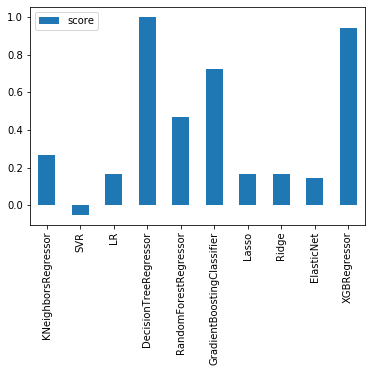

In [36]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [49]:
#Defining Instances For Differnt Models.
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
XGBRegressor=XGBRegressor()
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGBRegressor))

Model=[]
Score=[]
R2_score=[]
cvs=[]
mae=[]
mse=[]
Rmse=[]

# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
#   For Loop to Calculate R_2 Score, Cross Val Score.
for name, model in models:
    Model.append(name)
    print(model)
    print('\n')
    r_state=max_random_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error=',Meanabsoluteerror)
    mae.append(Meanabsoluteerror)
    print('\n')
    Meansquarederror = mean_squared_error(y_test, y_pred)
    print('Mean squared error=',Meansquarederror)
    mse.append(Meansquarederror)
    print('\n')
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean squared error=',RootMeansquarederror)
    Rmse.append(RootMeansquarederror)
    print('\n')

        


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 45 is: 0.22738896435008826
R2 Score :  0.22738896435008826


Cross_val_score= 0.1561437203880969


Mean absolute error= 363.14072742007664


Mean squared error= 361304.5996138717


Root Mean squared error= 601.0861831833033


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 0 is: 0
R2 Score :  -0.03933597228282859


Cross_val_score= -0.05159883380257879


Mean absolute error= 357.2429307562445


Mean squared error= 438162.7528786409


Root Mean squared error= 661.9386322603032


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


max r2 score corresponding to 87 is: 0.20361941923922955
R2 Score :  0.203619419239229

In [50]:
result=pd.DataFrame({'Model':Model,'r2_score':R2_score,'Cross_val_score':cvs,'Mean absolute error':mae,'Mean squared error':mse,'Root Mean squared error':Rmse})
result

,Model,r2_score,Cross_val_score,Mean absolute error,Mean squared error,Root Mean squared error
0,KNeighborsRegressor,22.738896,15.614372,363.140727,361304.599614,601.086183
1,SVR,-3.933597,-5.159883,357.242931,438162.752879,661.938632
2,LinearRegression,20.361942,16.827454,386.390075,342293.501402,585.058545
3,DecisionTreeRegressor,59.108473,41.394185,149.079634,212041.987939,460.480171
4,RandomForestRegressor,72.418496,70.004427,129.690352,119997.733984,346.406891
5,GradientBoostingRegressor,71.745517,68.129062,161.350803,121441.007281,348.483869
6,AdaBoostRegressor,62.809900,33.870999,254.891294,197180.864590,444.050520
7,Lasso,20.349586,16.857372,386.564486,342346.606960,585.103928
8,Ridge,20.362120,16.827593,386.391761,342292.735718,585.057891
9,ElasticNet,17.893578,14.974007,392.511203,352902.812783,594.056237


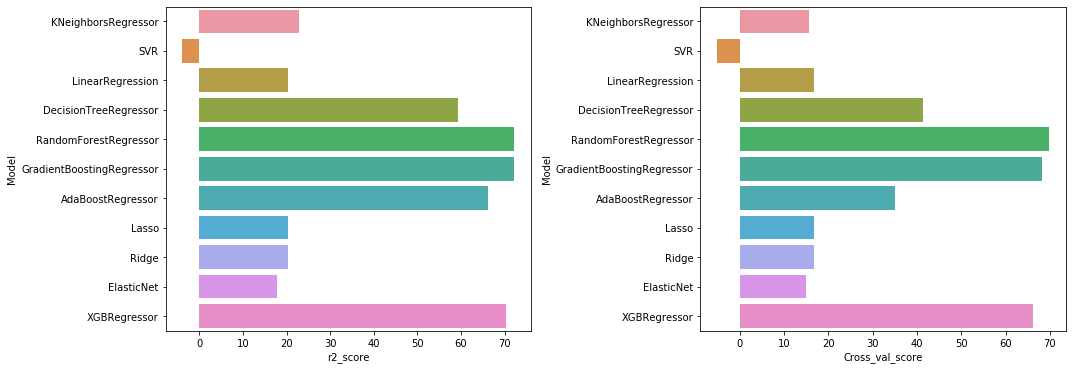

In [39]:
#Plotting bar plot of scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'r2_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [40]:
#function to evatulate errors
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    r2score = r2_score(y_test, y_preds)
    Meanabsoluteerror = mean_absolute_error(y_test, y_preds)
    Meansquarederror = mean_squared_error(y_test, y_preds)
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_preds))
    metric_dict = {"r2score": round(r2score, 2),
                   "Mean absolute error": round(Meanabsoluteerror, 2),
                   "Mean squared error": round(Meansquarederror, 2), 
                   "Root Mean squared error": round(RootMeansquarederror, 2),
                   }
    print(f"r2score: {r2score * 100:.2f}%")
    print(f"Mean absolute error: {Meanabsoluteerror:.2f}")
    print(f"Mean squared error: {Meansquarederror:.2f}")
    print(f"Root Mean squared error: {RootMeansquarederror:.2f}")

    return metric_dict

# Tuning a model with GridSearchCV


In [41]:
#for getting best set of parameters for GradientBoostingRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid1 = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}

clfD = GradientBoostingRegressor()

# Setup GridSearchCV
gs_clf1 = GridSearchCV(estimator=clfD,
                      param_grid=grid1,
                      cv=5, # 3-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clf1.fit(x_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


In [43]:
# best parameters for GradientBoostingRegressor
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'learning_rate': 0.01, 'n_estimators': 1000}
score: 0.6681345585210019


In [48]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(learning_rate=0.01, n_estimators= 1000)
max_random_score(gbr)

max r2 score corresponding to 87 is: 0.7254829212778675


87

In [90]:
#lets use gridsearchcv to find out best parameters for RandomForestRegressor
grid5 = {'n_estimators': [100, 500,700, 1000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestRegressor(n_jobs=1)

# Setup GridSearchCV
gs_clf5 = GridSearchCV(estimator=clf,
                      param_grid=grid5,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf5.fit(x_train, y_train);

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 23.0min finished


In [45]:
# best parameters for RandomForestRegressor
print("Best parameter:",gs_clf5.best_params_)
print("score:",gs_clf5.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 1000}
score: 0.6879443167488646


In [89]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestRegressor(n_estimators=1000,max_depth=None, min_samples_leaf= 2, max_features= 'auto',min_samples_split=6)
max_random_score(rf)

max r2 score corresponding to 47 is: 0.7305650045805265


47

In [46]:
from xgboost import XGBRegressor
#lets use gridsearchcv to find out best parameters for XGBRegressor
grid_6 = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
        "min_child_weight" : [ 1, 3, 5, 7 ],
        "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
         }
clf6 = XGBRegressor()

# Setup GridSearchCV
gs_clf6 = GridSearchCV(estimator=clf6,
                      param_grid=grid_6,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf6.fit(x_train, y_train);

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 39.6min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [47]:
# best parameters for XGBRegressor
print("Best parameter:",gs_clf6.best_params_)
print("score:",gs_clf6.best_score_)

Best parameter: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3}
score: 0.6804534599472178


In [53]:
from xgboost import XGBRegressor
#checking r2 score using best parameters which calculated from gridsearchCV
xgb=XGBRegressor(colsample_bytree= 0.7, gamma= 0.0, learning_rate= 0.1, max_depth= 5, min_child_weight= 3)
max_random_score(xgb)

max r2 score corresponding to 87 is: 0.7237343956133258


87

In [93]:
import lightgbm as lgb
#lets use gridsearchcv to find out best parameters for LGBMRegressor
grid_lgb = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
clflgb =lgb.LGBMRegressor(silent=False)

# Setup GridSearchCV
gs_clflgb = GridSearchCV(estimator=clflgb,
                      param_grid=grid_lgb,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clflgb.fit(x_train, y_train);

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 11.4min finished


In [94]:
# best parameters for LGBMRegressor
print("Best parameter:",gs_clflgb.best_params_)
print("score:",gs_clflgb.best_score_)

Best parameter: {'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 200, 'num_leaves': 300}
score: 0.6760521644949425


In [95]:
#checking r2 score using best parameters and scores which calculated from gridsearchCV
import lightgbm as lgb

lgbr=lgb.LGBMRegressor(silent=False,learning_rate=0.01 ,max_depth=25, n_estimators= 200, num_leaves=300)
max_random_score(lgbr)

max r2 score corresponding to 87 is: 0.7321628039494592


87

In [56]:
#using AdaBoostRegressor base_estimator as RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.20,random_state=47)
rf=RandomForestRegressor(n_estimators=100,max_depth=None, min_samples_leaf= 2, max_features= 'auto',min_samples_split=6)
ad=AdaBoostRegressor(base_estimator=rf)
ad.fit(x_train, y_train)
y_predrad = ad.predict(x_test)
evaluate_preds(y_test,y_predrad)


r2score: 71.55%
Mean absolute error: 148.21
Mean squared error: 139529.97
Root Mean squared error: 373.54


{'r2score': 0.72,
 'Mean absolute error': 148.21,
 'Mean squared error': 139529.97,
 'Root Mean squared error': 373.54}

# After all this process conclusion is that LGBMRegressor  is performing well because of high r2 score and less rmse error as compared to other models

In [96]:
#lets make our final model
import lightgbm as lgb
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.20,random_state=87)
lgbr=lgb.LGBMRegressor(silent=False,learning_rate=0.01 ,max_depth=25, n_estimators= 200, num_leaves=300)
lgbr.fit(x_train, y_train)
y_predlgbr = lgbr.predict(x_test)
evaluate_preds(y_test,y_predlgbr)


r2score: 73.22%
Mean absolute error: 159.62
Mean squared error: 115119.50
Root Mean squared error: 339.29


{'r2score': 0.73,
 'Mean absolute error': 159.62,
 'Mean squared error': 115119.5,
 'Root Mean squared error': 339.29}

Text(0, 0.5, 'Predicted Y')

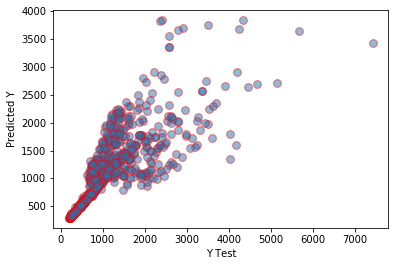

In [97]:
#plot of Y Test and Predicted Y
plt.scatter(x=y_test,y=y_predlgbr,marker="o",edgecolors ="r",s=60,alpha=0.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


Getting linear relatipnship means that our model performes well.

In [98]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predlgbr})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
8330,288.316541,358.260679
1246,333.144563,397.370748
5299,490.902749,530.793003
1021,515.607265,555.119985
2512,222.707275,301.882890
...,...,...
73,678.127020,716.356137
5070,626.534330,636.681294
1549,663.083609,866.183164
7634,726.161548,721.364317


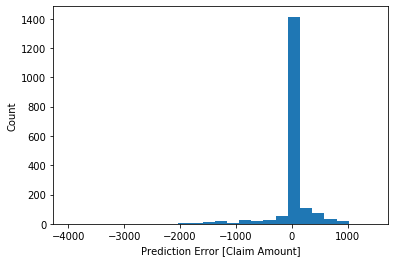

In [101]:
#lets visualize the error
error = y_predlgbr - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Claim Amount]")
_ = plt.ylabel("Count")

In [100]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(y_predlgbr)
df1.to_csv('Project16_Automobile_insurance_claim_submission.csv',index=False)

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (Claim Amount) 

In [102]:
# Find feature importance of our best model
lgbr.feature_importances_

array([  672,   396,   662,  2158,  2257,  3513,  9352,   108,  3854,
       16337,  2949,  3641,  2703,   734,   213,   895,   784,   689,
        3458,   237,   192])

In [103]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=40):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

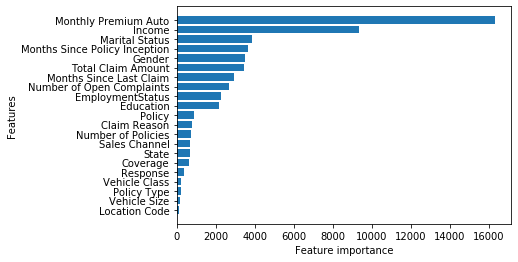

In [104]:
#bar plot of important features 
plot_features(x_train.columns, lgbr.feature_importances_)

Looks like Monthly Premium Auto contribute the most in Claim Amount.

In [105]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(lgbr,'Project16_Automobile_insurance_claim_submission.pkl')

['Project16_Automobile_insurance_claim_submission.pkl']

In [106]:
#read the file using joblib
lgbr_from_joblib=joblib.load('Project16_Automobile_insurance_claim_submission.pkl')
joblib_y_preds = lgbr_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

r2score: 73.22%
Mean absolute error: 159.62
Mean squared error: 115119.50
Root Mean squared error: 339.29


{'r2score': 0.73,
 'Mean absolute error': 159.62,
 'Mean squared error': 115119.5,
 'Root Mean squared error': 339.29}

## Conclusion:

1) All the persons are from US only.
2) More number of claims are from Missouri stae.
3) Number of Counts of Basic Coverage are more than Extended and Premium coverage.
4) Number of counts of Persons have Education= 'Bachelor' are more.
5) Number of counts of persons whose Employement Status is 'Employed'
6) Number of Female counts is more.
7) Number of counts for Suburban location code is more thamn rest.
8) Where Martial Status is Married, Number of Counts of Persons is more.
9) As 'Months since Last claim' increases number of person counts decreases.
10) Insurance claimers decreases as number of policies increases.
11) People chose Personal Auto policy more than rest.
12) Policy L3 have more number of customers.
13) More number of Persons mainly claims due to 'collision'
14) More number of persons Take policies via Agents.
15) More number of persons take claim for 'Four-Door-Car'.
16) More number of persons claims for medsize vehicle.
17) Oklohama state person's claims more amount.
18) Premium Coverage have more claim amount.
19) Education= 'High School or below' have more claim amount.
20) Employed persons have more claim Amount.
21) Females have more claim Amount.
22) Urban location have more claim amount.
23) Divorcees have more claim amount.
24) As monthly Premium Auto Increases Claim Amount also Increases.
25) As 'Months since Last claim' increases claim amount also increases.
26) Claim Amount decreases as number of Open Complaints increases.
27) Special L3 Auto have more claim amount.
28) Call Centres sales chanel have more claim amount.
29) small vehicle size have more claim amount. 

## Steps Followed:
1) Understanding Data.
2) EDA Analysis.
3) Best parameters are found using Gridsearch cv and applied to models.
4) Best parameters are applied to each models and machine is trained for each models to find Best R2 Score, Cross val score, mean squared error and root mean square error.
5) A Result table is made comprises of r2, cross_val score, mean squared error and root mean square error of each model.
6) LGBMRegressor is used to train the model finally as it's r2_score is best and error is less among the rest of the models.
7) Predicted values are saved in Project16_Automobile_insurance_claim_submission.csv file.
8) Pickle file is named with Project16_Automobile_insurance_claim_submission.pkl file